# Аналитика в Яндекс.Афише

Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Вы изучите:
как люди пользуются продуктом,
когда они начинают покупать,
сколько денег приносит каждый клиент
когда клиент окупается.

# Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plot
from matplotlib import pyplot as plt
import math
from IPython.display import display, HTML
import os
from math import factorial
from scipy import stats as st

In [2]:
# Добавляем данные
visits_log = pd.read_csv('/datasets/visits_log.csv')
orders_log = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
# Выводим информацию о дф
for file in os.listdir('/datasets/'):
    name = file.split('.csv')[0]
    if name in ['visits_log', 'orders_log', 'costs']:
        data = pd.read_csv('/datasets/{}'.format(file))
        print(name)
        display(data.info())
        display(data.describe(include='all'))
        for columns in data.columns:
            print(columns)
            display(data[columns].unique())
            display(data[columns].value_counts())
        print('file_end', '\n')

visits_log
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Device,End Ts,Source Id,Start Ts,Uid
count,359400,359400,359400.000000,359400,3.594000e+05
unique,2,224760,NaN,224303,NaN
top,desktop,2017-11-24 16:51:00,NaN,2017-11-24 16:06:00,NaN
freq,262567,23,NaN,19,NaN
mean,NaN,NaN,3.750515,NaN,9.202557e+18
std,NaN,NaN,1.917116,NaN,5.298433e+18
min,NaN,NaN,1.000000,NaN,1.186350e+13
25%,NaN,NaN,3.000000,NaN,4.613407e+18
50%,NaN,NaN,4.000000,NaN,9.227413e+18
75%,NaN,NaN,5.000000,NaN,1.372824e+19


Device


array(['touch', 'desktop'], dtype=object)

desktop    262567
touch       96833
Name: Device, dtype: int64

End Ts


array(['2017-12-20 17:38:00', '2018-02-19 17:21:00',
       '2017-07-01 01:54:00', ..., '2018-03-03 10:12:19',
       '2017-11-02 10:12:19', '2017-09-10 13:13:19'], dtype=object)

2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:40:00    14
                       ..
2017-06-11 13:27:00     1
2017-10-04 13:18:00     1
2017-12-26 15:11:00     1
2018-02-23 21:18:00     1
2018-05-11 13:38:00     1
Name: End Ts, Length: 224760, dtype: int64

Source Id


array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

Start Ts


array(['2017-12-20 17:20:00', '2018-02-19 16:53:00',
       '2017-07-01 01:54:00', ..., '2017-06-08 07:49:00',
       '2018-01-25 17:38:00', '2017-09-10 13:13:00'], dtype=object)

2017-11-24 16:06:00    19
2017-11-24 17:19:00    15
2017-11-24 17:21:00    15
2018-05-31 10:01:00    15
2017-11-24 15:57:00    14
                       ..
2017-12-11 12:18:00     1
2018-05-25 21:42:00     1
2017-07-17 19:56:00     1
2017-06-07 15:47:00     1
2018-02-06 19:48:00     1
Name: Start Ts, Length: 224303, dtype: int64

Uid


array([16879256277535980062,   104060357244891740,  7459035603376831527,
       ..., 11102751930812818282,   272012551460639309,
        3266363999948772866], dtype=uint64)

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: Uid, Length: 228169, dtype: int64

file_end 

costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,dt,costs
count,2542.000000,2542,2542.000000
unique,NaN,364,NaN
top,NaN,2017-11-07,NaN
freq,NaN,7,NaN
mean,4.857199,NaN,129.477427
std,3.181581,NaN,156.296628
min,1.000000,NaN,0.540000
25%,2.000000,NaN,21.945000
50%,4.000000,NaN,77.295000
75%,9.000000,NaN,170.065000


source_id


array([ 1,  2,  3,  4,  5,  9, 10])

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

dt


array(['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04',
       '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
       '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12',
       '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
       '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
       '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
       '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
       '2017-06-29', '2017-06-30', '2017-07-01', '2017-07-02',
       '2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
       '2017-07-07', '2017-07-08', '2017-07-09', '2017-07-10',
       '2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14',
       '2017-07-15', '2017-07-16', '2017-07-17', '2017-07-18',
       '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-22',
       '2017-07-23', '2017-07-24', '2017-07-25', '2017-07-26',
       '2017-07-27', '2017-07-28', '2017-07-29', '2017-07-30',
       '2017-07-31', '2017-08-01', '2017-08-02', '2017-

2017-11-07    7
2018-03-19    7
2017-10-03    7
2017-07-02    7
2018-01-12    7
             ..
2017-11-13    7
2018-03-10    7
2018-04-20    7
2018-05-30    7
2018-03-31    1
Name: dt, Length: 364, dtype: int64

costs


array([75.2 , 62.25, 36.53, ..., 11.32, 33.15, 17.6 ])

16.25     3
50.77     3
12.87     3
6.35      3
16.81     3
         ..
193.39    1
13.68     1
91.65     1
45.10     1
62.25     1
Name: costs, Length: 2396, dtype: int64

file_end 

orders_log
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Buy Ts,Revenue,Uid
count,50415,50415.000000,5.041500e+04
unique,45991,NaN,NaN
top,2018-05-31 10:13:00,NaN,NaN
freq,9,NaN,NaN
mean,NaN,4.999647,9.098161e+18
std,NaN,21.818359,5.285742e+18
min,NaN,0.000000,3.135781e+14
25%,NaN,1.220000,4.533567e+18
50%,NaN,2.500000,9.102274e+18
75%,NaN,4.890000,1.368290e+19


Buy Ts


array(['2017-06-01 00:10:00', '2017-06-01 00:25:00',
       '2017-06-01 00:27:00', ..., '2018-05-31 23:54:00',
       '2018-05-31 23:56:00', '2018-06-01 00:02:00'], dtype=object)

2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2018-05-31 10:02:00    7
2018-05-31 10:27:00    7
2017-11-24 17:36:00    7
                      ..
2017-10-12 12:58:00    1
2017-10-02 20:36:00    1
2018-02-17 19:42:00    1
2017-12-12 12:47:00    1
2017-07-02 21:46:00    1
Name: Buy Ts, Length: 45991, dtype: int64

Revenue


array([ 17.  ,   0.55,   0.37, ..., 290.58, 120.51,  92.89])

1.83       2552
2.44       2464
3.67       2421
1.22       2216
3.05       2041
           ... 
7.56          1
7.55          1
1236.28       1
14.27         1
107.55        1
Name: Revenue, Length: 1149, dtype: int64

Uid


array([10329302124590727494, 11627257723692907447, 17903680561304213844,
       ...,  1786462140797698849,  3993697860786194247,
          83872787173869366], dtype=uint64)

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: Uid, Length: 36523, dtype: int64

file_end 



Критичных моментов не замеченно.
__________________________________
Source Id отличается в двух дф по кол-ву вариантов:
- [ 1,  2,  3,  4,  5,  9, 10,  7,  6]
- [ 1,  2,  3,  4,  5,  9, 10]

Судя по датам, ввели новые каналы.
__________________________________
Необходимо привести название колонок к нижнему регистру
__________________________________
Изменить формат для дат в:

visits_log:
- Start Ts
- End Ts

costs:
- dt

orders_log:
- Buy Ts
__________________________________
Убрать нулевые сессии

In [4]:
# меняем формат для дат
visits_log['Start Ts'] = pd.to_datetime(visits_log['Start Ts'])
visits_log['End Ts'] = pd.to_datetime(visits_log['End Ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

orders_log['Buy Ts'] = pd.to_datetime(orders_log['Buy Ts'])

In [5]:
# нижний регистр
visits_log.rename(str.lower, axis='columns', inplace=True)
orders_log.rename(str.lower, axis='columns', inplace=True)

In [6]:
# стандартизация колонок
visits_log = visits_log.rename(columns={'device':'device', 'end ts':'end_ts', 'source id':'source_id',
                                        'start ts':'start_ts', 'uid':'uid'})
orders_log = orders_log.rename(columns={'buy ts':'buy_ts', 'revenue':'revenue','uid':'uid'})

In [7]:
# выносим девайсы в отдельный дф
device = visits_log[['device', 'uid']].drop_duplicates('uid')
orders_log = orders_log.merge(device, on='uid', how='inner')

In [8]:
# убираем нулевые сессии
visits_log = visits_log[~((visits_log['end_ts'] - visits_log['start_ts']).astype('int') <= 0)]

# Шаг 2. Постройте отчёты и посчитайте метрики

# Продукт

# Сколько людей пользуются в день, неделю, месяц?

Среднее значение юид в год: 110647.5


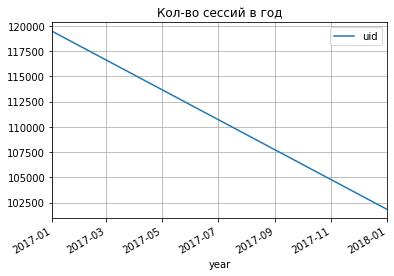

Среднее значение юид в месяц: 20955.666666666668


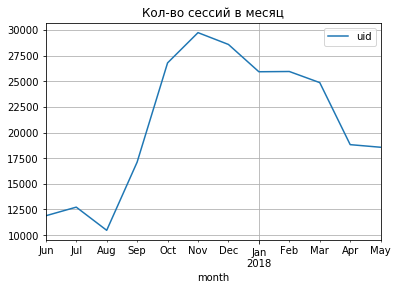

Среднее значение юид в неделю: 5155.528301886792


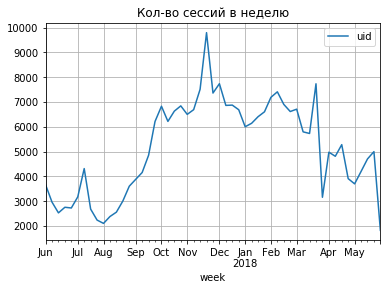

In [9]:
# выносим недели, года, месецы
visits_log['year'] = visits_log['start_ts'].astype('datetime64[Y]')
visits_log['month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['week'] = visits_log['start_ts'].astype('datetime64[W]')

# группировка по отрезкам времени
uid_in_year = visits_log.groupby('year').agg({'uid':'nunique'})
uid_in_month = visits_log.groupby('month').agg({'uid':'nunique'})
uid_in_week = visits_log.groupby('week').agg({'uid':'nunique'})

# Выведем инфо о среднем кол-ве пользователей
print('Среднее значение юид в год:', uid_in_year['uid'].mean())
uid_in_year.plot(title='Кол-во сессий в год', grid=True);
plt.show()
print('Среднее значение юид в месяц:', uid_in_month['uid'].mean())
uid_in_month.plot(title='Кол-во сессий в месяц', grid=True);
plt.show()
print('Среднее значение юид в неделю:', uid_in_week['uid'].mean())
uid_in_week.plot(title='Кол-во сессий в неделю', grid=True);
plt.show()

Кол-во уникальных посетителй выросло в определенный момент, но потом пошло на спад.

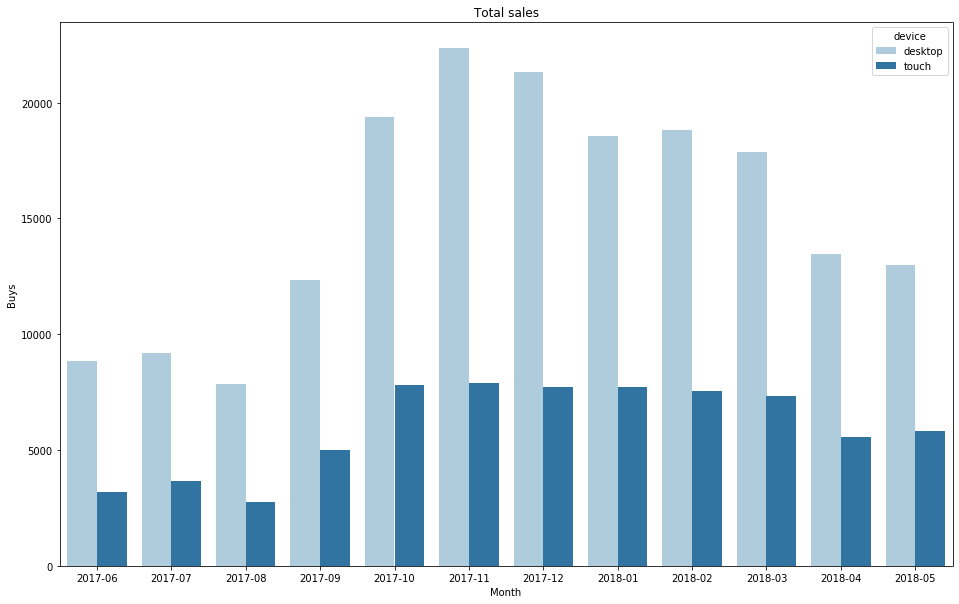

In [10]:
# узнаем кол-во пользователей разных девайсов
uid_in_month_device = visits_log.pivot_table(index=['month', 'device'], values='uid', aggfunc='nunique')

uid_in_month_device=uid_in_month_device[['uid']].reset_index()
uid_in_month_device['month'] = uid_in_month_device['month'].dt.strftime('%Y-%m')
plt.figure(figsize=(16, 10))
uid_in_month_device_sns = sns.barplot(x='month', y='uid', hue='device', palette='Paired', data=uid_in_month_device);
uid_in_month_device_sns.set(xlabel='Month', ylabel='Buys', title = 'Total sales');

Определенно сервисом пользуются в основном с ПК
Уменьшение/увеличение пользователей ~одинаково

# Сколько сессий в день?

uid    889.021978
dtype: float64


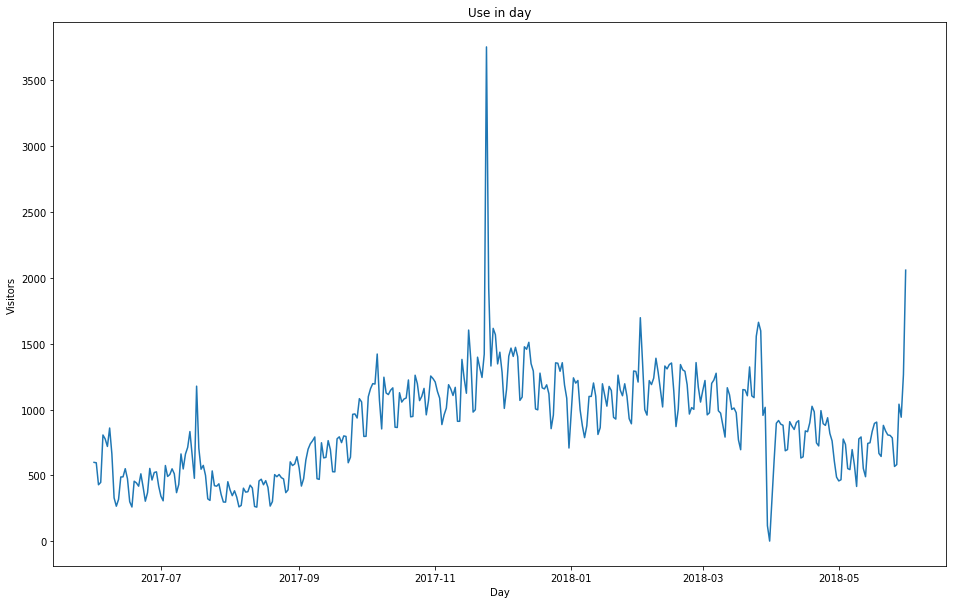

In [11]:
# разбивка по дням и вывод снс графика групированных данных
visits_log['day'] = visits_log['start_ts'].astype('datetime64[D]')
use_in_day = visits_log.groupby('day').agg({'uid':'count'})
print(use_in_day.mean())
use_in_day=use_in_day[['uid']].reset_index()
plt.figure(figsize=(16, 10))
use_in_day_sns = sns.lineplot(x='day', y='uid', data=use_in_day);
use_in_day_sns.set(xlabel='Day', ylabel='Visitors', title = 'Use in day');

Есть выбивающиеся значения, которые и создали это пике на более общих графиках. Необходимо узнать, что их вызвало.

# Сколько длится одна сессия?

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:208: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


6.0


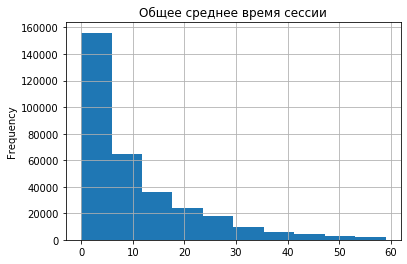

4.0


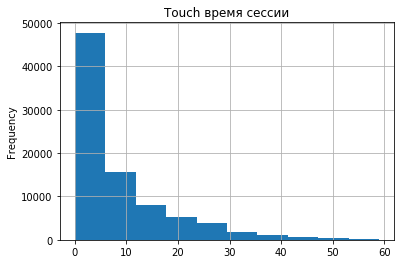

7.0


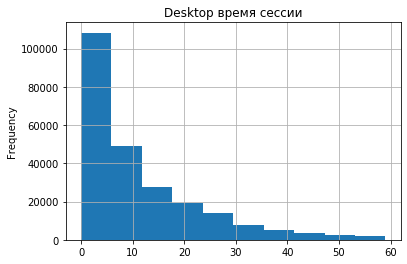

In [12]:
# Выведем средние знгачения сессии. Общие показатели, для десктопа и для тача 
sessions_time = visits_log['end_ts'] - visits_log['start_ts']
sessions_time_log = pd.to_datetime(sessions_time).dt.strftime('%M.%S').astype(float)
print(sessions_time_log.median())
sessions_time_log.plot(kind='hist', title='Общее среднее время сессии', grid=True)
plt.show()
sessions_time = visits_log['end_ts'][visits_log['device'] == 'touch'] - visits_log['start_ts'][visits_log['device'] == 'touch']
sessions_time_log = pd.to_datetime(sessions_time).dt.strftime('%M.%S').astype(float)
print(sessions_time_log.median())
sessions_time_log.plot(kind='hist', title='Touch время сессии', grid=True)
plt.show()
sessions_time = visits_log['end_ts'][visits_log['device'] == 'desktop'] \
                                                                    - visits_log['start_ts'][visits_log['device'] == 'desktop']
sessions_time_log = pd.to_datetime(sessions_time).dt.strftime('%M.%S').astype(float)
print(sessions_time_log.median())
sessions_time_log.plot(kind='hist', title='Desktop время сессии', grid=True)
plt.show()

Общая медиана времени сессии 6 минут. Для десктопа оно больше, чем для тача, что показывает различие оптимизаций под платформы.
Но в целом разница несущественна.

# Как часто люди возвращаются?

In [13]:
# находим начало каждого юида
first_start_date = visits_log.groupby('uid')['start_ts'].min()
first_start_date.name = 'first_start_date'
visits_log = visits_log.join(first_start_date, on='uid')
visits_log['first_start_month'] = visits_log['first_start_date'].astype('datetime64[M]')

In [14]:
# формируем временную когорту для общего дф
cb_uid_group_cohorts = visits_log.groupby(['first_start_month', 'month']).agg({'uid':'nunique'})
cb_uid_group_cohorts = cb_uid_group_cohorts.reset_index()
cb_uid_group_cohorts['cohort_lifetime'] = cb_uid_group_cohorts['month'] - cb_uid_group_cohorts['first_start_month']
cb_uid_group_cohorts['cohort_lifetime'] = cb_uid_group_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
cb_uid_group_cohorts['cohort_lifetime'] = cb_uid_group_cohorts['cohort_lifetime'].round().astype('int')
cb_uid_group_cohorts['first_start_month'] = cb_uid_group_cohorts['first_start_month'].dt.strftime('%Y-%m')

In [15]:
# формируем временную когорту для дф с девайсами
cb_uid_group_cohorts_device = visits_log.groupby(['first_start_month', 'month', 'device']).agg({'uid':'nunique'})
cb_uid_group_cohorts_device = cb_uid_group_cohorts_device.reset_index()
cb_uid_group_cohorts_device['cohort_lifetime'] = \
                                        cb_uid_group_cohorts_device['month'] - cb_uid_group_cohorts_device['first_start_month']
cb_uid_group_cohorts_device['cohort_lifetime'] = cb_uid_group_cohorts_device['cohort_lifetime'] / np.timedelta64(1, 'M')
cb_uid_group_cohorts_device['cohort_lifetime'] = cb_uid_group_cohorts_device['cohort_lifetime'].round().astype('int')
cb_uid_group_cohorts_device['first_start_month'] = cb_uid_group_cohorts_device['first_start_month'].dt.strftime('%Y-%m')

_______________________________________________________________________________________________________________________

In [16]:
initial_users_count = cb_uid_group_cohorts[cb_uid_group_cohorts['cohort_lifetime']==0][['first_start_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cb_uid_group_cohorts = cb_uid_group_cohorts.merge(initial_users_count, on='first_start_month')
cb_uid_group_cohorts['retention'] = cb_uid_group_cohorts['uid'] / cb_uid_group_cohorts['cohort_users']

In [17]:
initial_users_count_device = cb_uid_group_cohorts_device[cb_uid_group_cohorts_device['cohort_lifetime']==0] \
                                                                                [['first_start_month','uid', 'device']]
initial_users_count_device = initial_users_count_device.rename(columns={'uid':'cohort_users'})
cb_uid_group_cohorts_device = cb_uid_group_cohorts_device.merge(initial_users_count_device, on=['first_start_month', 'device'])
cb_uid_group_cohorts_device['retention'] = cb_uid_group_cohorts_device['uid'] / cb_uid_group_cohorts_device['cohort_users']

In [18]:
retention_pivot = cb_uid_group_cohorts.pivot_table(
    index='first_start_month', 
    columns='cohort_lifetime', 
    values='retention', 
    aggfunc='sum')

In [19]:
retention_pivot_device = cb_uid_group_cohorts_device.pivot_table(
    index='first_start_month', 
    columns='cohort_lifetime', 
    values='retention', 
    aggfunc='sum')

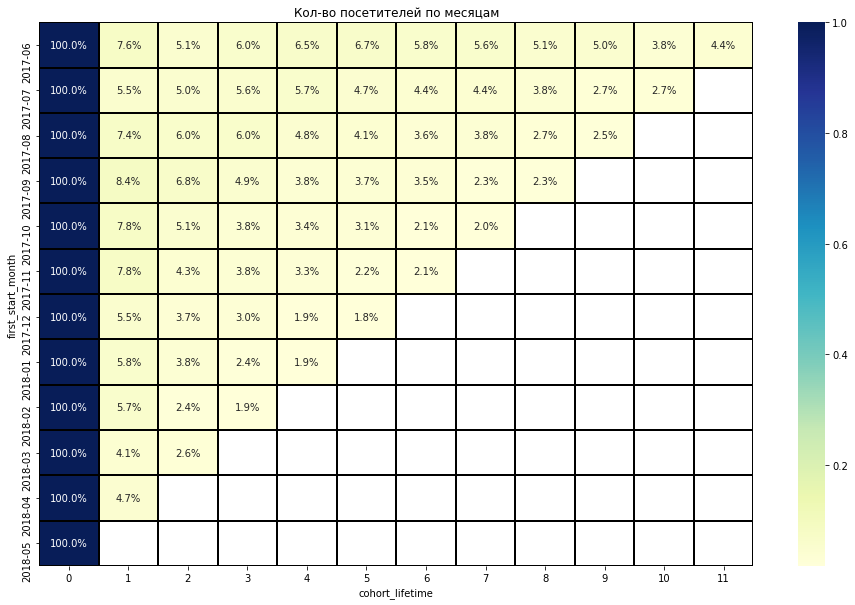

In [20]:
plt.figure(figsize=(16, 10))
plt.title('Кол-во посетителей по месяцам')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, cmap="YlGnBu", linecolor='black');

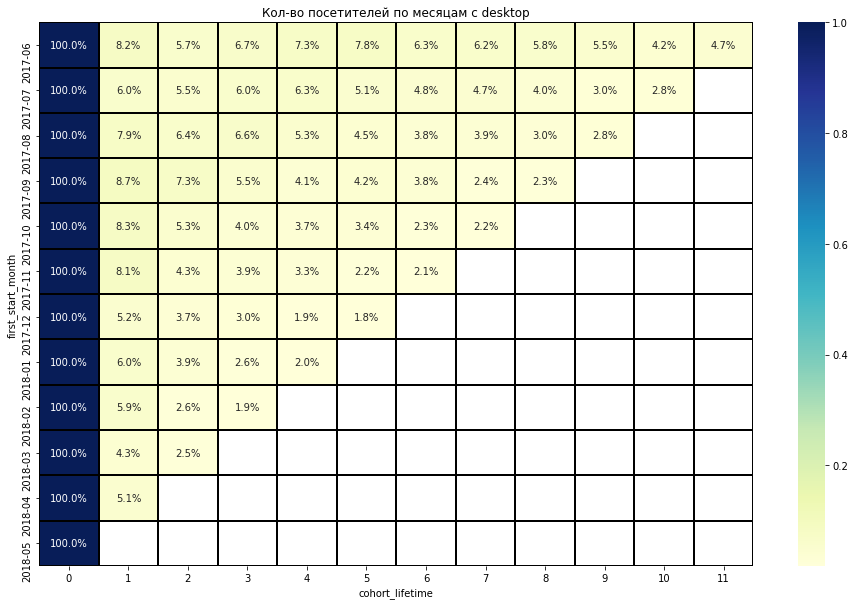

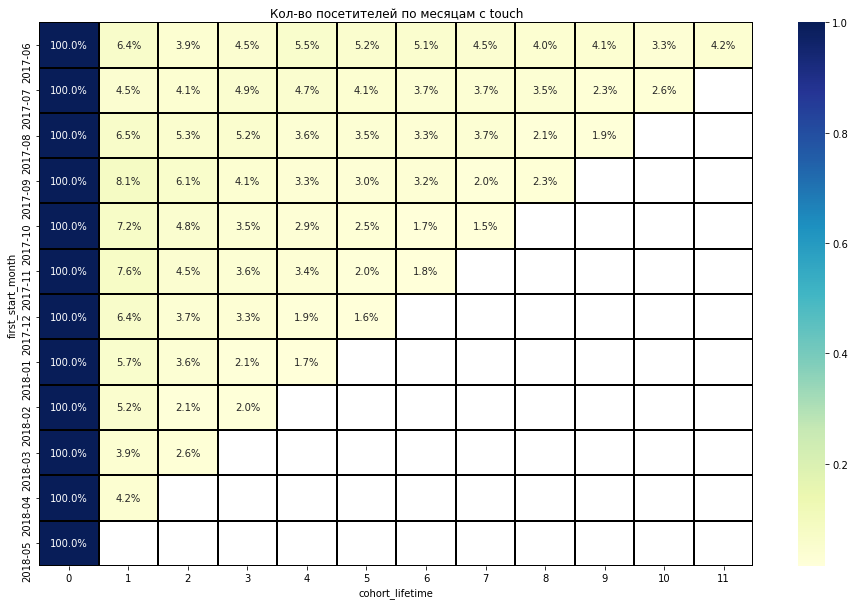

In [21]:
for device in cb_uid_group_cohorts_device.device.unique():
    output = cb_uid_group_cohorts_device.query('device == @device').pivot_table(
    index='first_start_month', 
    columns='cohort_lifetime', 
    values='retention', 
    aggfunc='sum')
    plt.figure(figsize=(16, 10))
    sns.heatmap(output, annot=True, fmt='.1%', linewidths=1, cmap="YlGnBu", linecolor='black');
    plt.title('Кол-во посетителей по месяцам c '+str(device))
    plt.show()

_______________________________________________________________________________________________________________________

In [23]:
# создаем таблицу
cb_uid_per_month = cb_uid_group_cohorts.pivot_table(
    index='first_start_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='mean'
)

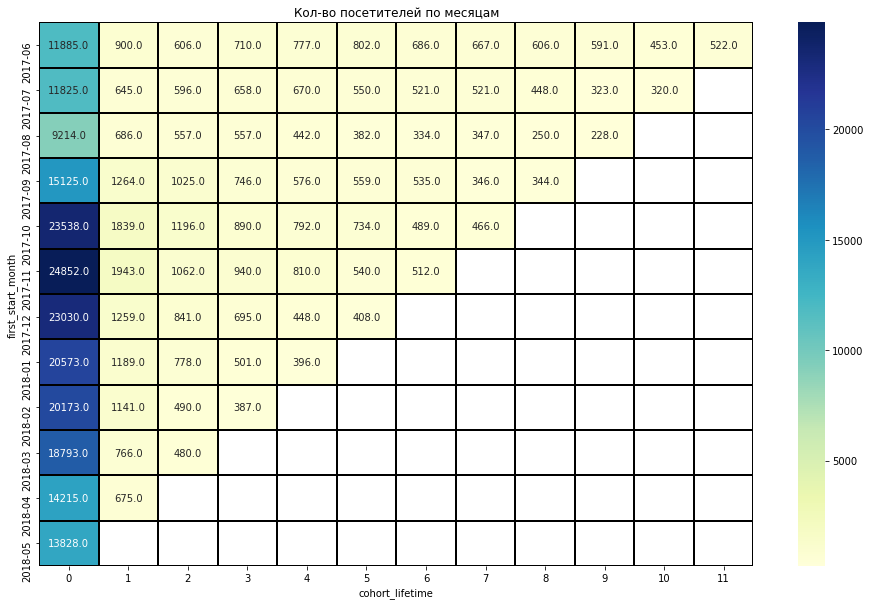

In [24]:
# создаем общую снс тепловую карту посетителей по месяцам
plt.figure(figsize=(16, 10))
plt.title('Кол-во посетителей по месяцам')
sns.heatmap(cb_uid_per_month, annot=True, fmt='.1f', linewidths=1, cmap="YlGnBu", linecolor='black');

С удержанием клиента все оч плохо. Это даже не 10%

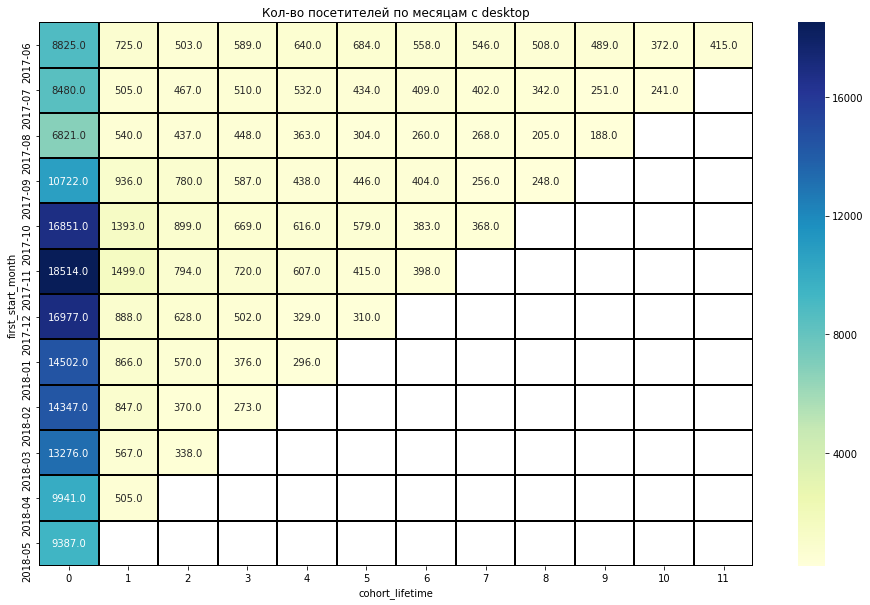

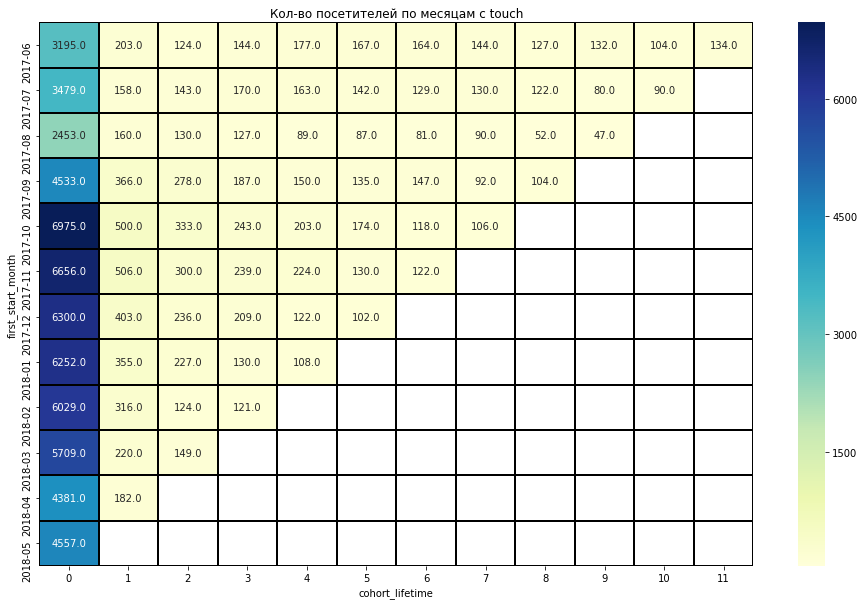

In [25]:
# создаем снс тепловую карту посетителей по месяцам от вида девайса
for device in cb_uid_group_cohorts_device.device.unique():
    output = cb_uid_group_cohorts_device.query('device == @device').pivot_table(
    index='first_start_month', 
    columns='cohort_lifetime', 
    values='uid', 
    aggfunc='mean')
    plt.figure(figsize=(16, 10))
    sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, cmap="YlGnBu", linecolor='black');
    plt.title('Кол-во посетителей по месяцам c '+str(device))
    plt.show()

Клиенты не хотят оставаться постоянными пользователями на любых платформах

# Продажи

# Когда люди начинают покупать?

In [26]:
# определим дату первой покупки
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')
first_buy = orders_log.groupby('uid').agg({'order_month':'min'}).reset_index()
first_buy.columns = ['uid', 'first_buy']

In [27]:
# объеденим общие таблицы покупки и посещений для того, чтобы сопоставить первый заход и первую покупку.
# создадим временные когорты(группируем с начала использования)
first_buy_log = pd.merge(visits_log, first_buy, on='uid')
first_buy_log.drop_duplicates(['uid', 'first_buy'], inplace = True)
first_buy_group_cohorts = first_buy_log.groupby(['month', 'first_buy', 'first_start_month']).agg({'uid':'nunique'})
first_buy_group_cohorts = first_buy_group_cohorts.reset_index()
first_buy_group_cohorts['cohort_lifetime'] = first_buy_group_cohorts['month'] - first_buy_group_cohorts['first_start_month']
first_buy_group_cohorts['cohort_lifetime'] = first_buy_group_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
first_buy_group_cohorts['cohort_lifetime'] = first_buy_group_cohorts['cohort_lifetime'].round().astype('int')
first_buy_group_cohorts['first_buy'] = first_buy_group_cohorts['first_buy'].dt.strftime('%Y-%m')

In [28]:
# объеденим таблицы покупки и посещений в зависимости от девайса для того, чтобы сопоставить первый заход и первую покупку.
# создадим временные когорты(группируем с начала использования)
first_buy_group_cohorts_device = (first_buy_log.groupby(['month','first_buy', 'first_start_month', 'device'])
                                  .agg({'uid':'nunique'}))
first_buy_group_cohorts_device = first_buy_group_cohorts_device.reset_index()
first_buy_group_cohorts_device['cohort_lifetime'] = \
                                first_buy_group_cohorts_device['month'] - first_buy_group_cohorts_device['first_start_month']
first_buy_group_cohorts_device['cohort_lifetime'] = first_buy_group_cohorts_device['cohort_lifetime'] / np.timedelta64(1, 'M')
first_buy_group_cohorts_device['cohort_lifetime'] = first_buy_group_cohorts_device['cohort_lifetime'].round().astype('int')
first_buy_group_cohorts_device['first_buy'] = first_buy_group_cohorts_device['first_buy'].dt.strftime('%Y-%m')

In [29]:
# создадим общую таблицу, суммировав пользователей
first_buy_per_month = first_buy_group_cohorts.pivot_table(
    index='first_buy',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='sum'
)

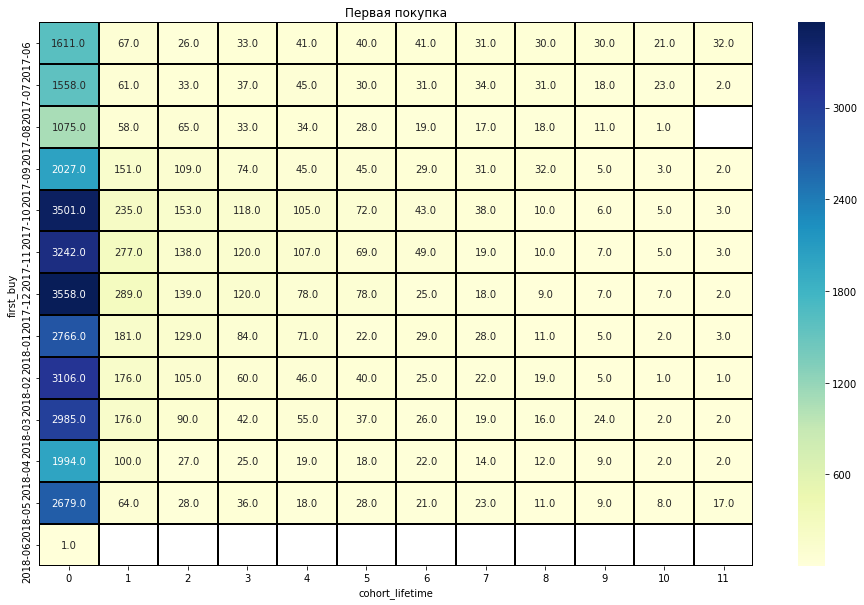

In [30]:
plt.figure(figsize=(16, 10))
plt.title('Первая покупка')
sns.heatmap(first_buy_per_month, annot=True, fmt='.1f', linewidths=1, cmap='YlGnBu', linecolor='black');

Чаще всего пользователи совершают покупку сразу.

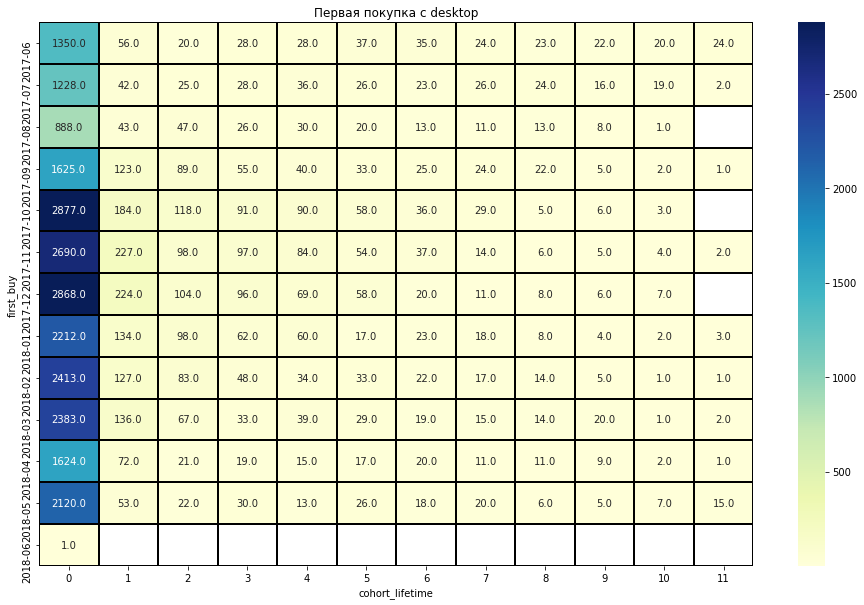

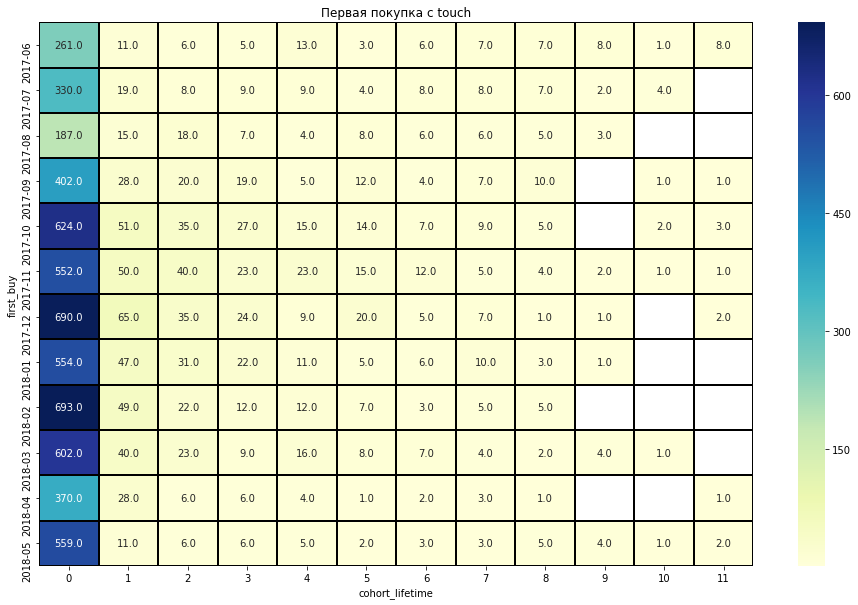

In [31]:
for device in first_buy_group_cohorts_device.device.unique():
    output = first_buy_group_cohorts_device.query('device == @device').pivot_table(
    index='first_buy', 
    columns='cohort_lifetime', 
    values='uid', 
    aggfunc='sum')
    plt.figure(figsize=(16, 10))
    sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, cmap="YlGnBu", linecolor='black');
    plt.title('Первая покупка c '+str(device))
    plt.show()

Чаще всего пользователи совершают покупку сразу вне зависимости от девайса

# Сколько раз покупают за период?

In [32]:
# объеденим дф первой покупки и общий дф покупок
# формируем временную когорту исходя из даты первой покупки
new_orders_log = pd.merge(orders_log, first_buy, on='uid')

orders_group_cohorts = new_orders_log.groupby(['first_buy','order_month']).agg({'uid': 'count'}).reset_index()
orders_group_cohorts = orders_group_cohorts.reset_index()

orders_group_cohorts['cohort_lifetime'] = orders_group_cohorts['order_month'] - orders_group_cohorts['first_buy']
orders_group_cohorts['cohort_lifetime'] = orders_group_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_group_cohorts['cohort_lifetime'] = orders_group_cohorts['cohort_lifetime'].round().astype('int')
orders_group_cohorts['first_buy'] = orders_group_cohorts['first_buy'].dt.strftime('%Y-%m')

In [33]:
# объеденим дф первой покупки и общий дф покупок
# формируем временную когорту, зависимую от девайсов, исходя из даты первой покупки
new_orders_log = pd.merge(orders_log, first_buy, on='uid')

orders_group_cohorts_device = new_orders_log.groupby(['first_buy','order_month', 'device']).agg({'uid': 'count'}).reset_index()
orders_group_cohorts_device = orders_group_cohorts_device.reset_index()

orders_group_cohorts_device['cohort_lifetime'] = \
                                        orders_group_cohorts_device['order_month'] - orders_group_cohorts_device['first_buy']
orders_group_cohorts_device['cohort_lifetime'] = orders_group_cohorts_device['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_group_cohorts_device['cohort_lifetime'] = orders_group_cohorts_device['cohort_lifetime'].round().astype('int')
orders_group_cohorts_device['first_buy'] = orders_group_cohorts_device['first_buy'].dt.strftime('%Y-%m')

In [34]:
orders_per_month = orders_group_cohorts.pivot_table(
    index='first_buy',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='mean'
)

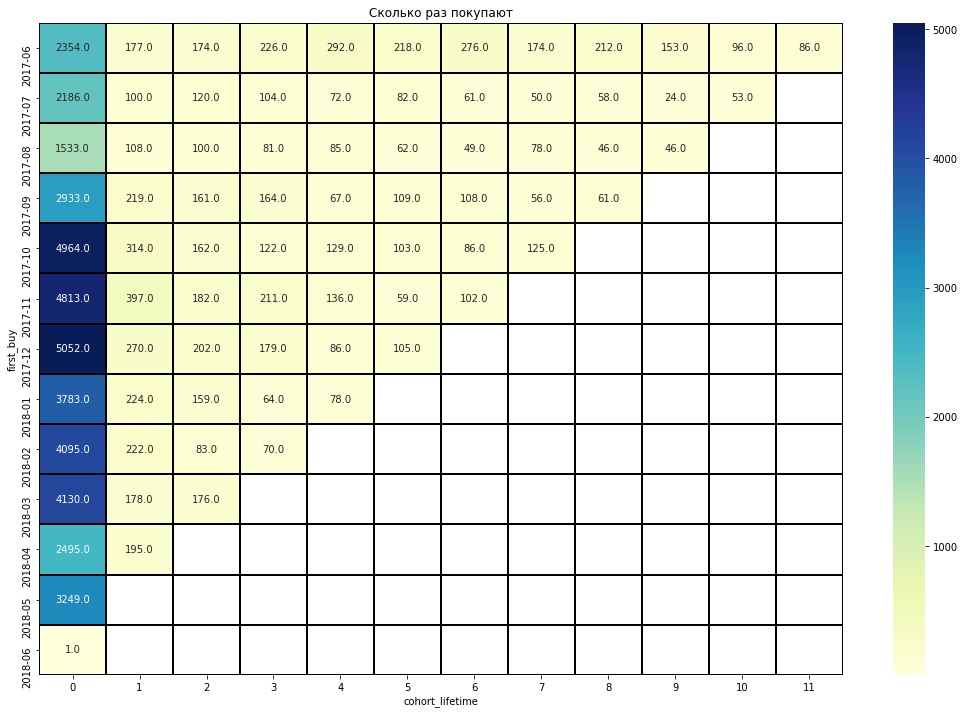

In [35]:
plt.figure(figsize=(18, 12))
plt.title('Сколько раз покупают')
sns.heatmap(orders_per_month, annot=True, fmt='.1f', linewidths=1, cmap='YlGnBu', linecolor='black');

Покупают чаще всего на старте, потом идет резкий спад продаж

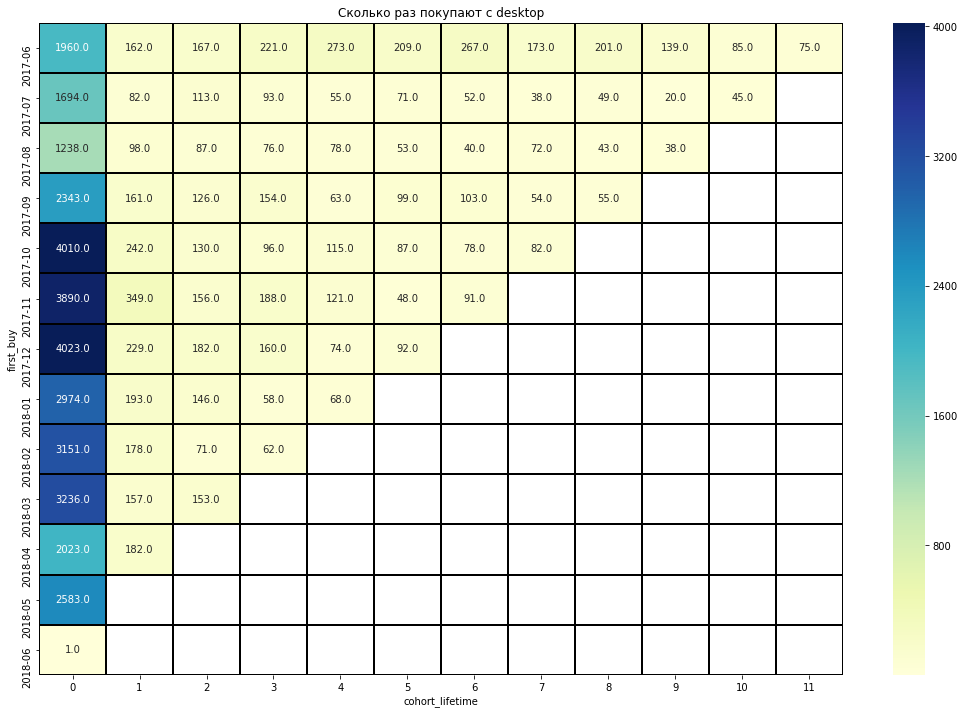

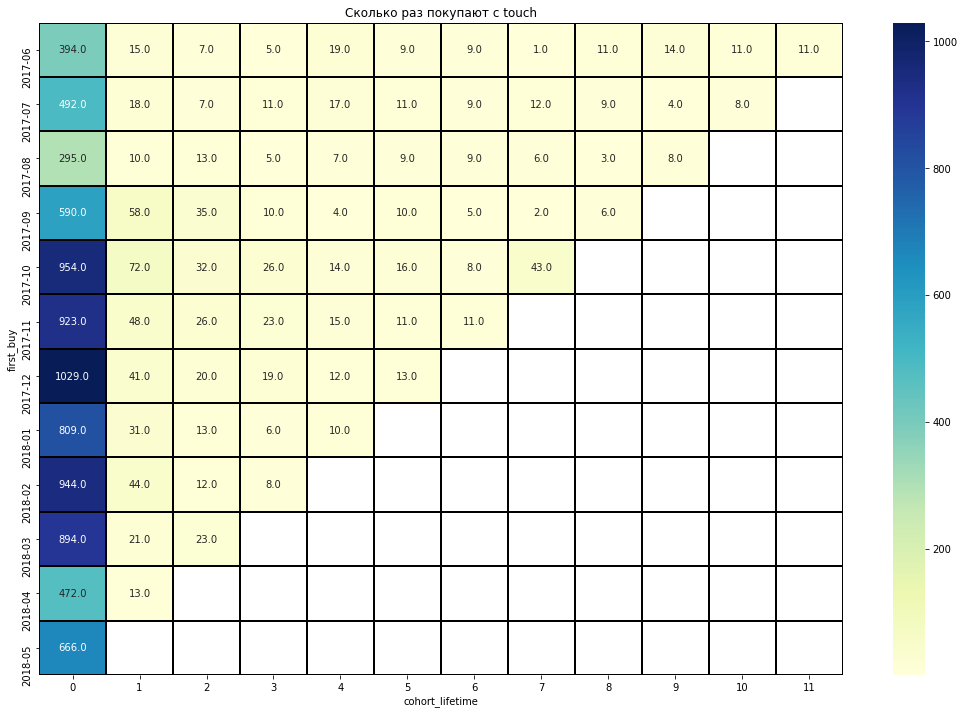

In [36]:
for device in orders_group_cohorts_device.device.unique():
    output = orders_group_cohorts_device.query('device == @device').pivot_table(
    index='first_buy', 
    columns='cohort_lifetime', 
    values='uid', 
    aggfunc='mean')
    plt.figure(figsize=(18, 12))
    sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, cmap="YlGnBu", linecolor='black');
    plt.title('Сколько раз покупают c '+str(device))
    plt.show()

Покупают чаще всего на старте, потом идет резкий спад продаж в не зависимости от девайса

# Какой средний чек?

In [37]:
#
print('Cредний чек {:.1f}'.format(new_orders_log['revenue'].mean()))
#
print('Часто встречающийся чек {:.1f}'.format(new_orders_log['revenue'].mode()[0]))

Cредний чек 5.0
Часто встречающийся чек 1.8


In [38]:
# объеденим дф первой покупки и общий дф покупок
# формируем временную когорту исходя из даты первой покупки, находим среднюю платежку
revenue_group_cohorts = new_orders_log.groupby(['first_buy','order_month']).agg({'revenue': 'mean'}).reset_index()
revenue_group_cohorts = revenue_group_cohorts.reset_index()

revenue_group_cohorts['cohort_lifetime'] = revenue_group_cohorts['order_month'] - revenue_group_cohorts['first_buy']
revenue_group_cohorts['cohort_lifetime'] = revenue_group_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
revenue_group_cohorts['cohort_lifetime'] = revenue_group_cohorts['cohort_lifetime'].round().astype('int')
revenue_group_cohorts['first_buy'] = revenue_group_cohorts['first_buy'].dt.strftime('%Y-%m')

In [39]:
# объеденим дф первой покупки и общий дф покупок
# формируем временную когорту, зависимую от девайсов, исходя из даты первой покупки, находим среднюю платежку
revenue_group_cohorts_device = new_orders_log.groupby(['first_buy','order_month', 'device']).agg({'revenue': 'mean'}).reset_index()
revenue_group_cohorts_device = revenue_group_cohorts_device.reset_index()

revenue_group_cohorts_device['cohort_lifetime'] = \
                                        revenue_group_cohorts_device['order_month'] - revenue_group_cohorts_device['first_buy']
revenue_group_cohorts_device['cohort_lifetime'] = revenue_group_cohorts_device['cohort_lifetime'] / np.timedelta64(1, 'M')
revenue_group_cohorts_device['cohort_lifetime'] = revenue_group_cohorts_device['cohort_lifetime'].round().astype('int')
revenue_group_cohorts_device['first_buy'] = revenue_group_cohorts_device['first_buy'].dt.strftime('%Y-%m')

In [40]:
mean_revenue_per_month = revenue_group_cohorts.pivot_table(
    index='first_buy',
    columns='cohort_lifetime',
    values='revenue',
    aggfunc='mean'
)

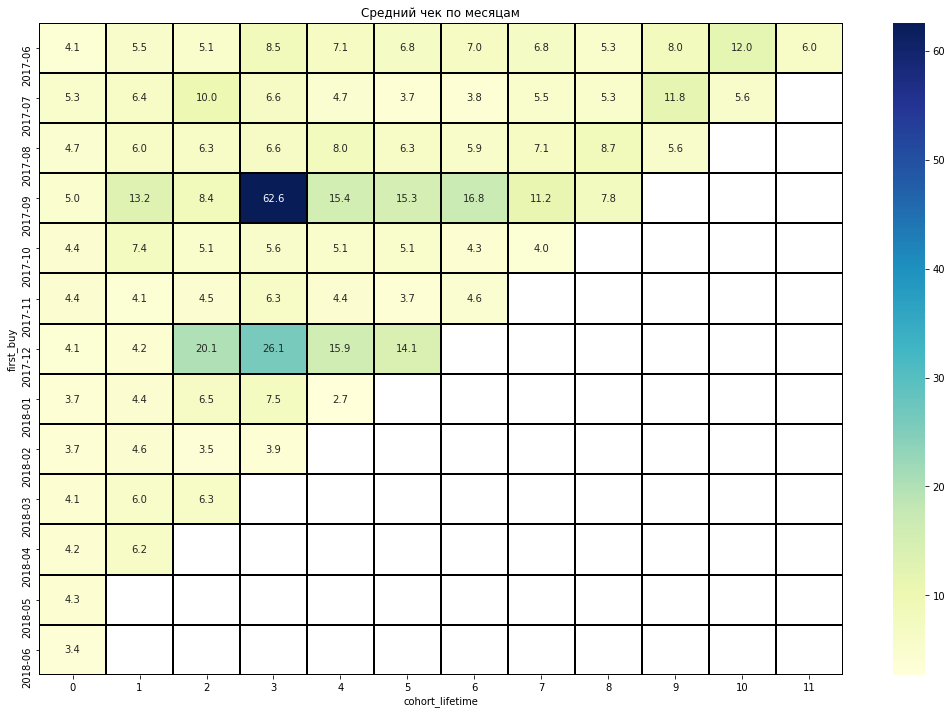

In [41]:
plt.figure(figsize=(18, 12))# Задайте величину фигуры
plt.title('Средний чек по месяцам')
sns.heatmap(mean_revenue_per_month, annot=True, fmt='.1f', linewidths=1, cmap='YlGnBu', linecolor='black');

В среднем все плохо, но видно пару выбивающихся значений. Это как раз те выбивающиеся значения, что были в сессиях

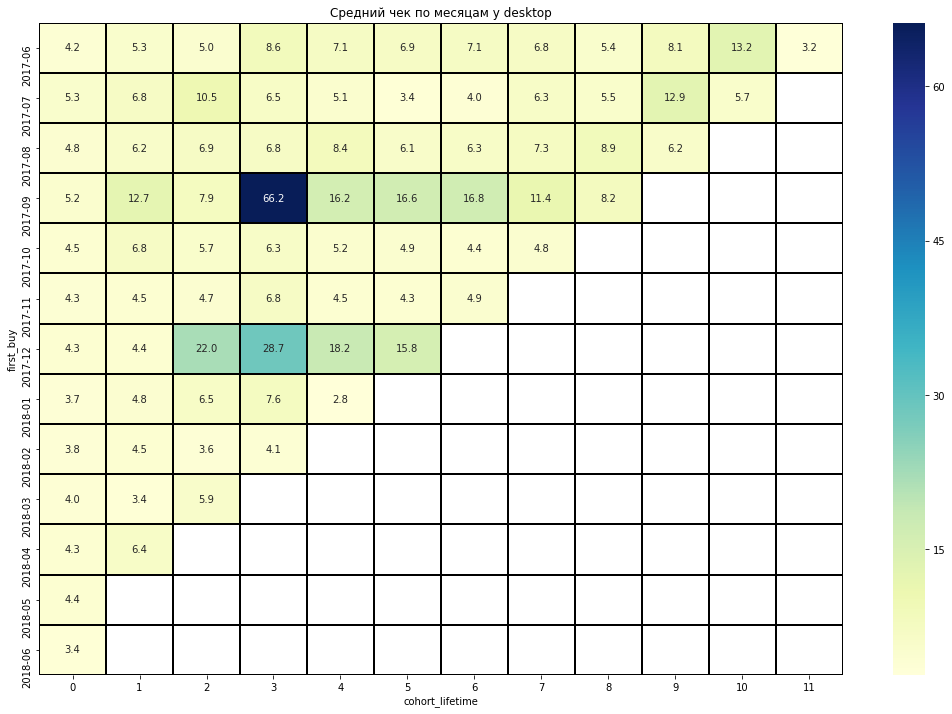

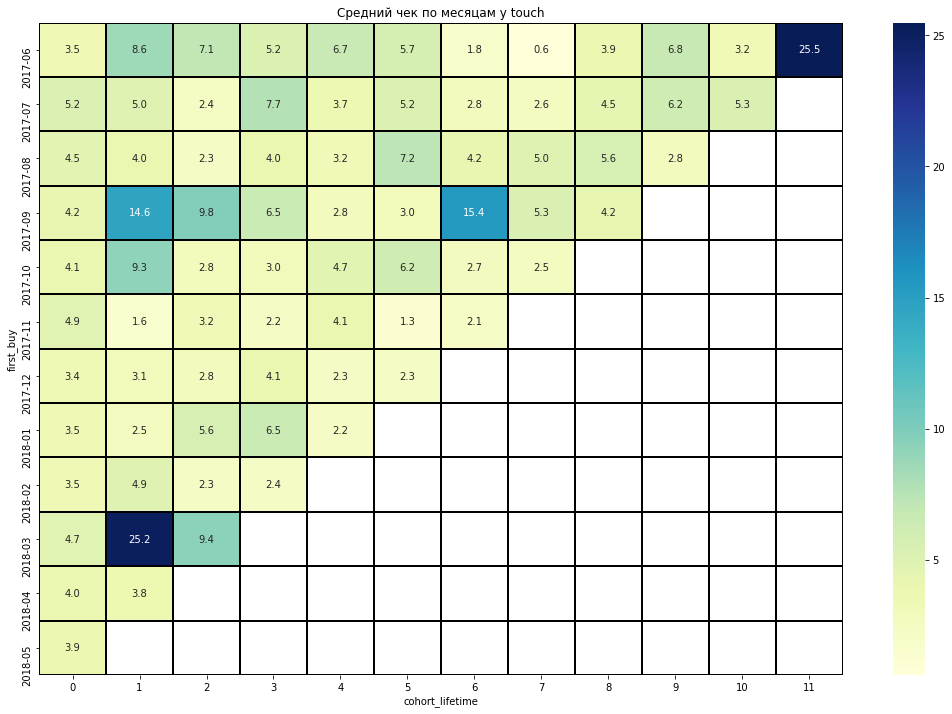

In [43]:
for device in revenue_group_cohorts_device.device.unique():
    output = revenue_group_cohorts_device.query('device == @device').pivot_table(
    index='first_buy', 
    columns='cohort_lifetime', 
    values='revenue', 
    aggfunc='mean')
    plt.figure(figsize=(18, 12))
    sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, cmap="YlGnBu", linecolor='black');
    plt.title('Средний чек по месяцам у '+str(device))
    plt.show()

Средний общий чек у тача ниже, чем у десктопа. Но у тача тепловая карта разбита намного лучше

# Сколько денег приносят? (LTV)

In [44]:
# посчитаем количество новых покупателей за каждый месяц
# создаем когорты для дф с источниками

In [45]:
cohort_sizes_sourse = (first_buy.join(visits_log.groupby('uid')
                                   .agg({'start_ts': 'min','source_id': 'first'}), on='uid', how='inner')
                    .drop('start_ts', axis=1))
cohort_sizes_sourse = (cohort_sizes_sourse.groupby(['first_buy', 'source_id']).
                              agg({'uid': 'nunique'}).reset_index())
cohort_sizes_sourse.columns = ['first_buy', 'source_id', 'n_buyers']

In [46]:
# посчитаем количество новых покупателей за каждый месяц
#создаем когорты для общего дф

In [47]:
cohort_sizes = first_buy.groupby('first_buy').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy', 'n_buyers']

In [48]:
# месяц первой покупки каждого покупателя уже имеется
# сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = new_orders_log.groupby(['first_buy','order_month']).agg({'revenue': 'sum'}).reset_index()

new_orders_log_sourse = (new_orders_log.merge(visits_log.groupby('uid')
                                   .agg({'start_ts': 'min','source_id': 'first'}), on='uid', how='inner')
                    .drop('start_ts', axis=1))
cohorts_sourse = new_orders_log_sourse.groupby(['first_buy','order_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()

In [49]:
# добавим в таблицу данные о том, сколько людей первый раз совершили покупку в каждый месяц
# расчитаем LTV. margin_rate не указан, поэтому принимаем за него 1.
report = pd.merge(cohort_sizes, cohorts, on='first_buy')
report['age'] = (report['order_month'] - report['first_buy']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report

,first_buy,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [50]:
# добавим в таблицу с источниками данные о том, сколько людей первый раз совершили покупку в каждый месяц
# расчитаем LTV. margin_rate не указан, поэтому принимаем за него 1.
report_sourse = pd.merge(cohort_sizes_sourse, cohorts_sourse, on=['first_buy', 'source_id'])
report_sourse['age'] = (report_sourse['order_month'] - report_sourse['first_buy']) / np.timedelta64(1, 'M')
report_sourse['age'] = report_sourse['age'].round().astype('int')
report_sourse.drop_duplicates(inplace=True)
report_sourse

,first_buy,source_id,n_buyers,order_month,revenue,age
0,2017-06-01,1,202,2017-06-01,1264.20,0
1,2017-06-01,1,202,2017-07-01,372.72,1
2,2017-06-01,1,202,2017-08-01,156.77,2
3,2017-06-01,1,202,2017-09-01,695.88,3
4,2017-06-01,1,202,2017-10-01,766.85,4
...,...,...,...,...,...,...
509,2018-05-01,4,746,2018-05-01,3135.24,0
510,2018-05-01,5,505,2018-05-01,2087.24,0
511,2018-05-01,9,55,2018-05-01,205.68,0
512,2018-05-01,10,113,2018-05-01,453.52,0


In [67]:
# расчет LTV
# создание таблицы для снс
report['ltv'] = report['revenue'] / report['n_buyers']
report_ltv = report[['first_buy', 'n_buyers', 'revenue', 'age', 'ltv']]
report_ltv['first_buy'] = report_ltv['first_buy'].dt.strftime('%Y-%m')

report_sourse['ltv'] = report_sourse['revenue'] / report_sourse['n_buyers']


report_output = report_ltv.pivot_table(
        index='first_buy', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


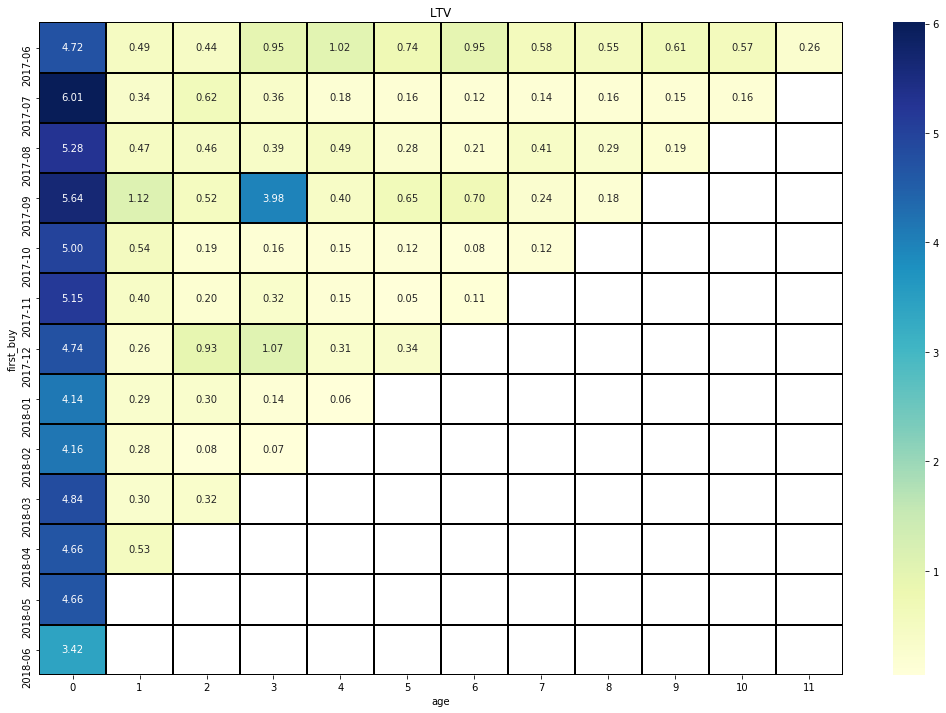

In [69]:
plt.figure(figsize=(18, 12))# Задайте величину фигуры
plt.title('LTV')
sns.heatmap(report_output, annot=True, fmt='.2f', linewidths=1, cmap='YlGnBu', linecolor='black');

In [70]:
m6_cum_ltv = report_output.cumsum(axis=1).mean(axis=0)[11]
print('Средний LTV за 11 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 11 месяцев после первой покупки: 11.88


Опять все продажи происходят в начале использования сервиса. Только декабрь у одной когорты удался 

# Маркетинг

# Сколько денег потратили? Всего / на каждый источник / по времени

In [54]:
# посчитаем общее кол-во затрат
print(costs['costs'].sum())

329131.62


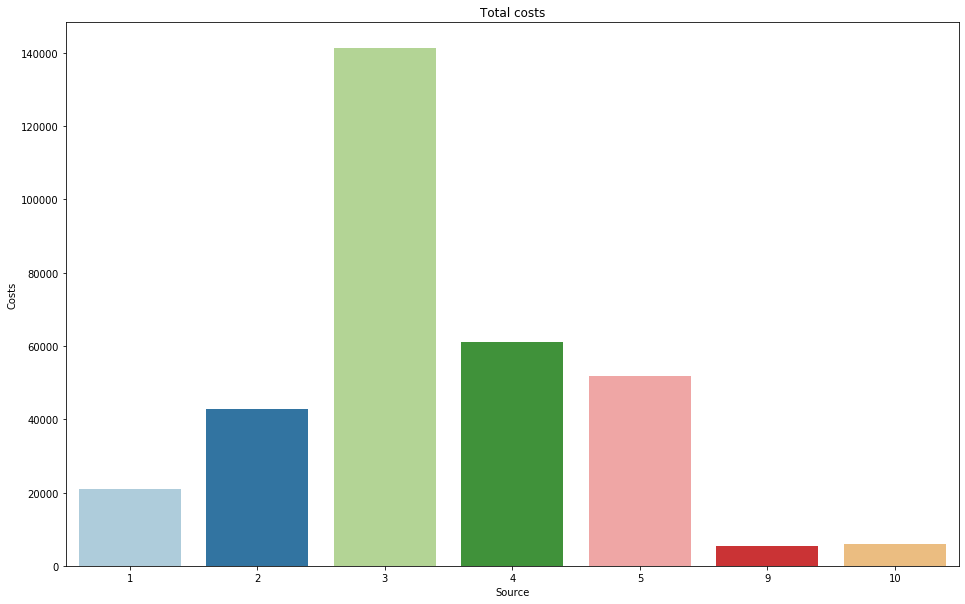

In [55]:
# Распределим затраты по источникам
all_sourse_id = costs.groupby('source_id').agg({'costs':'sum'})
all_sourse_id=all_sourse_id.reset_index()
plt.figure(figsize=(16, 10))
all_sourse_id_sns = sns.barplot(x='source_id', y='costs', palette='Paired', data=all_sourse_id);
all_sourse_id_sns.set(xlabel='Source', ylabel='Costs', title = 'Total costs');

Больше всего затрат ушло на третий источник

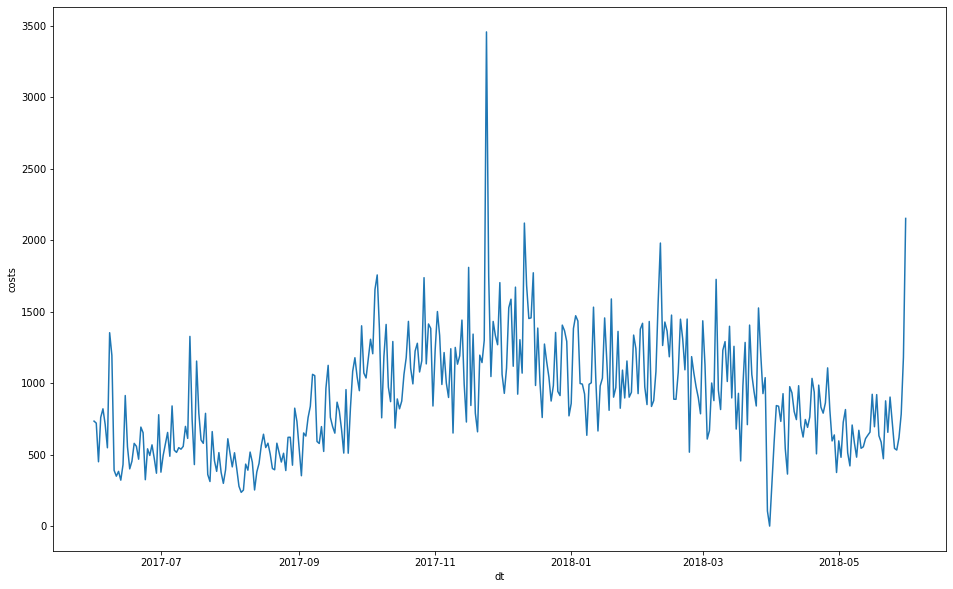

In [56]:
time_costs = costs.groupby('dt').agg({'costs':'sum'})
time_costs=time_costs[['costs']].reset_index()
plt.figure(figsize=(16, 10))
time_costs_sns = sns.lineplot(x='dt', y='costs', data=time_costs);
use_in_day_sns.set(xlabel='Date', ylabel='Costs', title = 'Costs in all time');

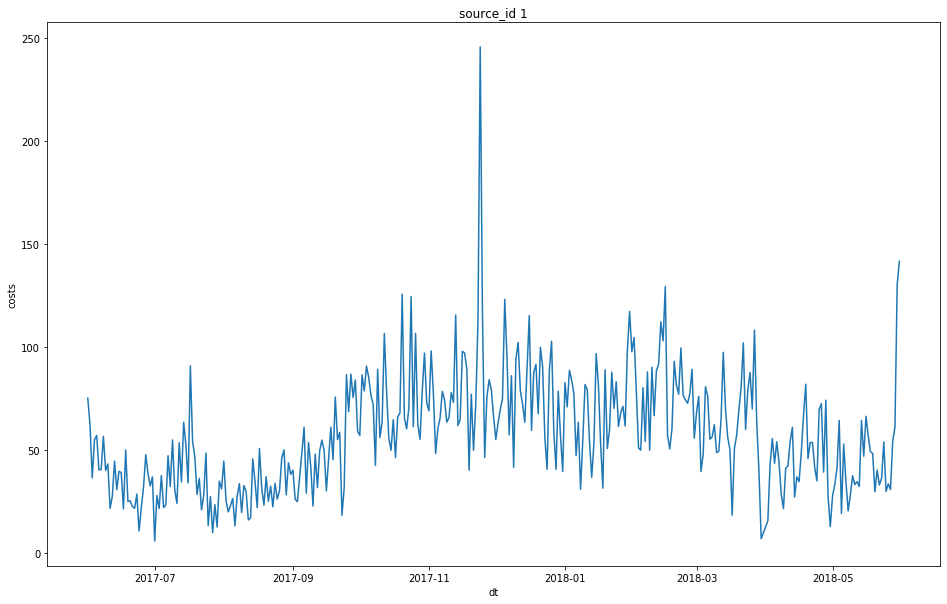

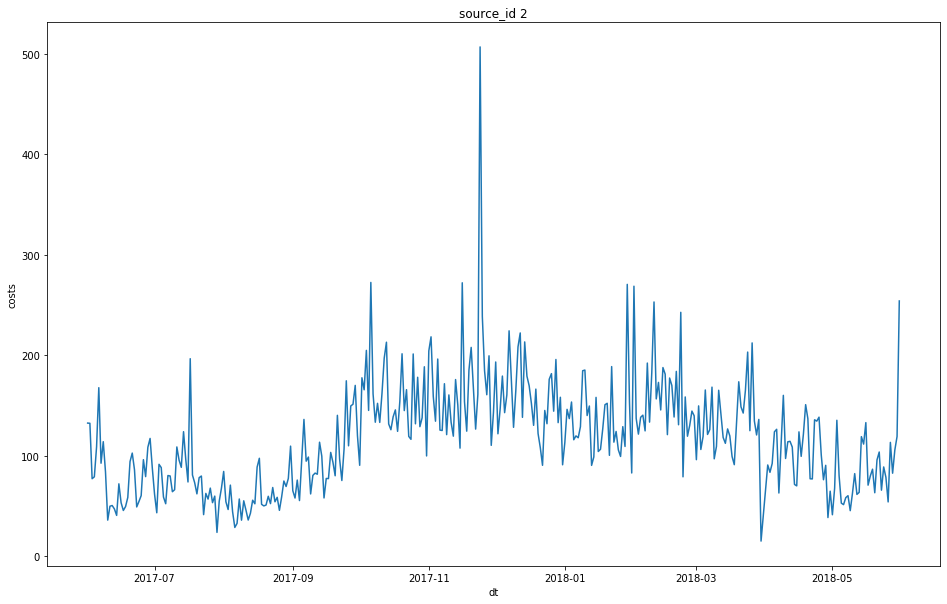

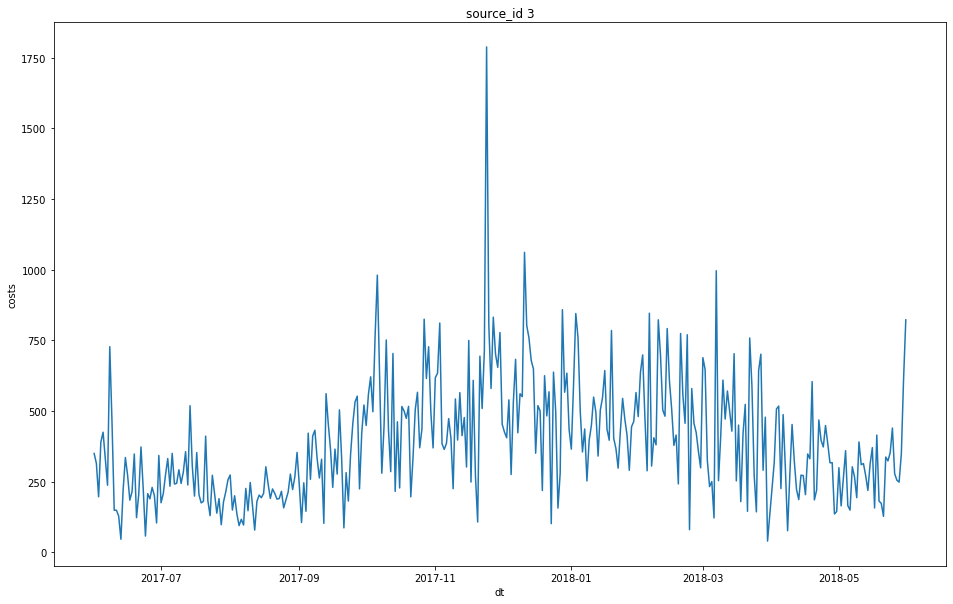

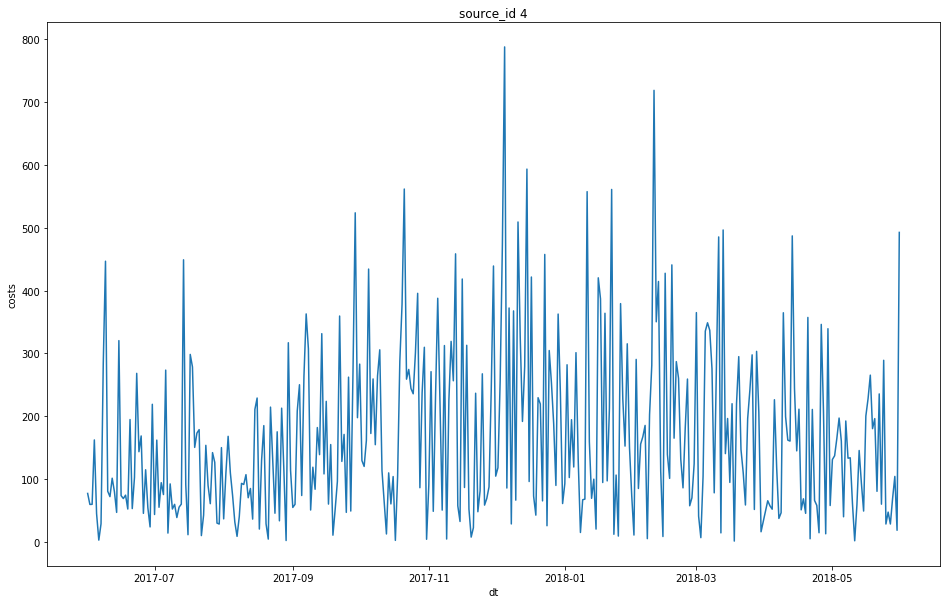

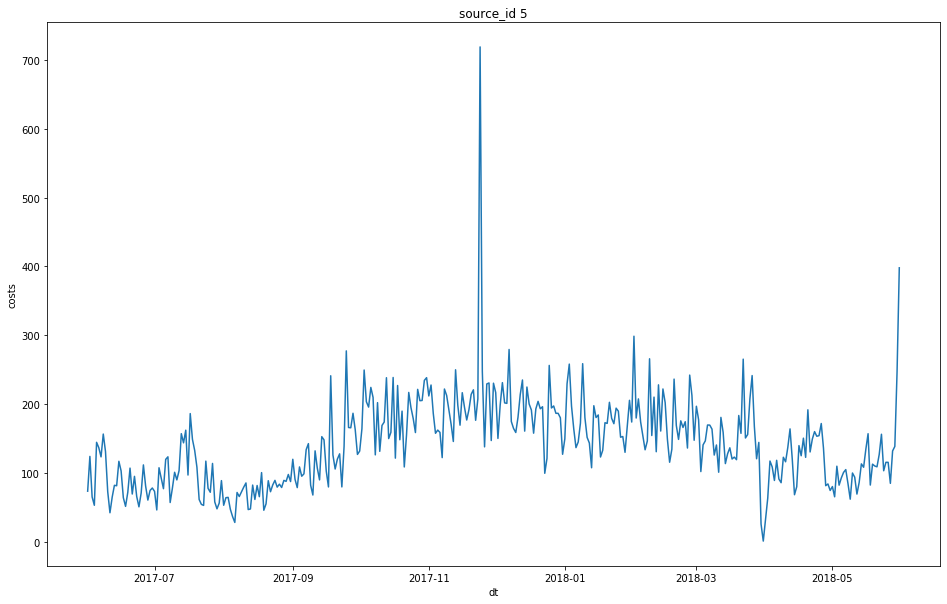

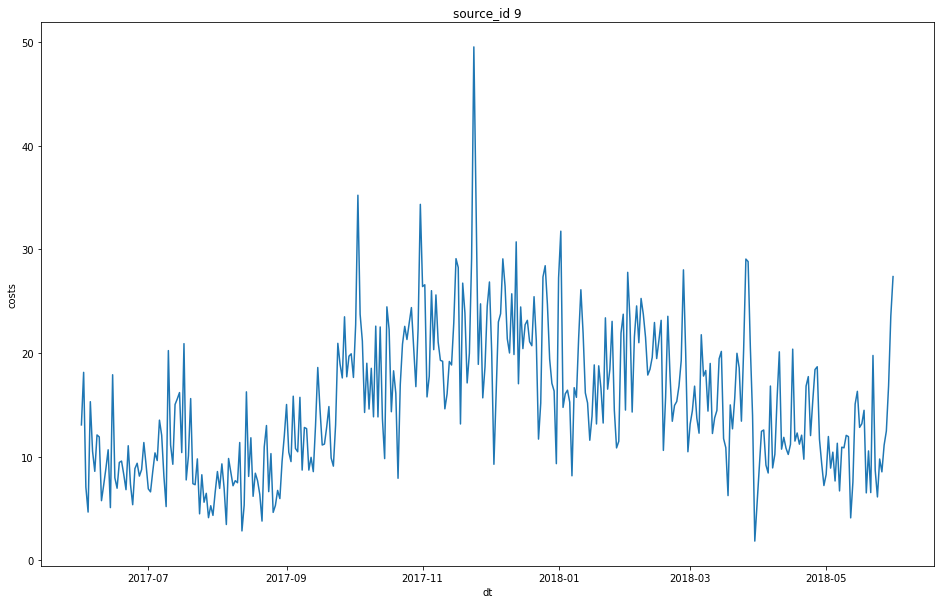

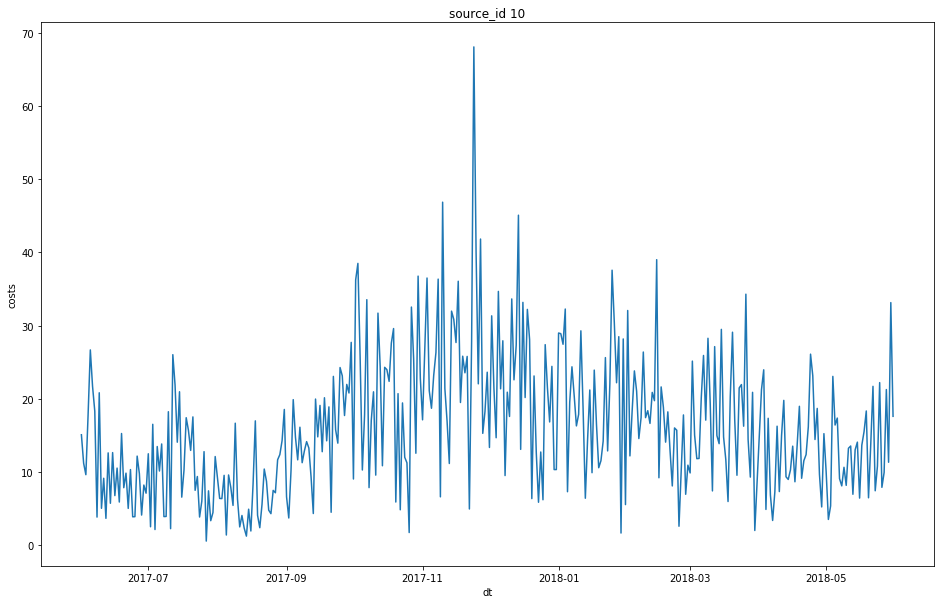

In [57]:
for source in costs.source_id.unique():
    output = costs.query('source_id == @source').groupby(['dt', 'source_id']).agg({'costs':'sum'})
    plt.figure(figsize=(16, 10))
    sns.lineplot(x='dt', y='costs', data=output.reset_index());
    plt.title('source_id '+str(source))
    plt.show()

Видим увеличение затрат. На то время пришлись повышенные продажи и заходы

# Сколько стоило привлечение одного покупателя из каждого источника?

In [58]:
# группируем пользователей по заходу с источника
order_visits_log = (orders_log.join(visits_log.groupby('uid')
                                   .agg({'start_ts': 'min','source_id': 'first'}), on='uid', how='inner')
                    .drop('start_ts', axis=1))

In [59]:
# пересекаем с заходами
order_visits_costs_log = order_visits_log.merge(costs,
                                                left_on=['order_month', 'source_id'], right_on=['dt', 'source_id'],
                                                how='inner')

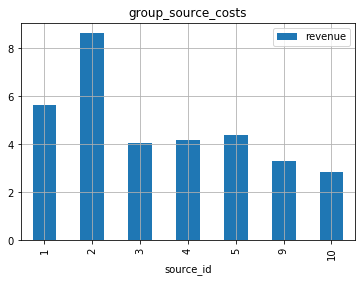

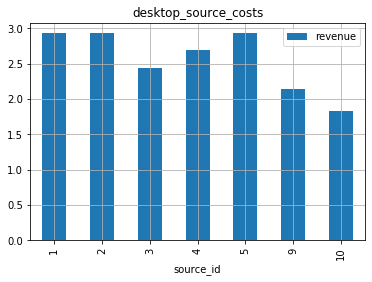

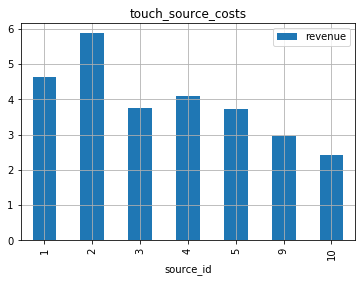

In [60]:
# выводим на экран среднюю общую стоимость привлечения, а так же для тача/десктопа
order_visits_costs_log.groupby('source_id').agg({'revenue':'mean'}).plot(kind='bar', 
                                                                        y='revenue', grid=True, title='group_source_costs');
order_visits_costs_log.query('device == "desktop"').groupby('source_id').agg({'revenue':'median'}).plot(kind='bar', 
                                                                        y='revenue', grid=True, title='desktop_source_costs');
order_visits_costs_log.query('device != "desktop"').groupby('source_id').agg({'revenue':'mean'}).plot(kind='bar', 
                                                                        y='revenue', grid=True, title='touch_source_costs');

Самый дорогой источник - 2. Самое дешевое привлечение - через десктоп.

# На сколько окупились расходы? (ROI)

In [61]:
# посчитаем окупаемость
# сначала найдем сас
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month').sum().drop('source_id', axis=1)
report_new = pd.merge(report, monthly_costs, left_on='first_buy', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['first_buy'] = report_new['first_buy'].dt.strftime('%Y-%m')
report_new

,first_buy,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06,2023,2017-06-01,9557.49,0,4.724414,18015.00,8.905091
1,2017-06,2023,2017-07-01,981.82,1,0.485329,18015.00,8.905091
2,2017-06,2023,2017-08-01,885.34,2,0.437637,18015.00,8.905091
3,2017-06,2023,2017-09-01,1931.30,3,0.954671,18015.00,8.905091
4,2017-06,2023,2017-10-01,2068.58,4,1.022531,18015.00,8.905091
...,...,...,...,...,...,...,...,...
73,2018-03,3533,2018-04-01,1063.05,1,0.300892,30415.27,8.608907
74,2018-03,3533,2018-05-01,1114.87,2,0.315559,30415.27,8.608907
75,2018-04,2276,2018-04-01,10600.69,0,4.657597,22289.38,9.793225
76,2018-04,2276,2018-05-01,1209.92,1,0.531599,22289.38,9.793225


In [62]:
# теперь посчитаем ROMI
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new_output = report_new.pivot_table(
    index='first_buy', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

report_new_output = report_new_output.cumsum(axis=1).round(2)

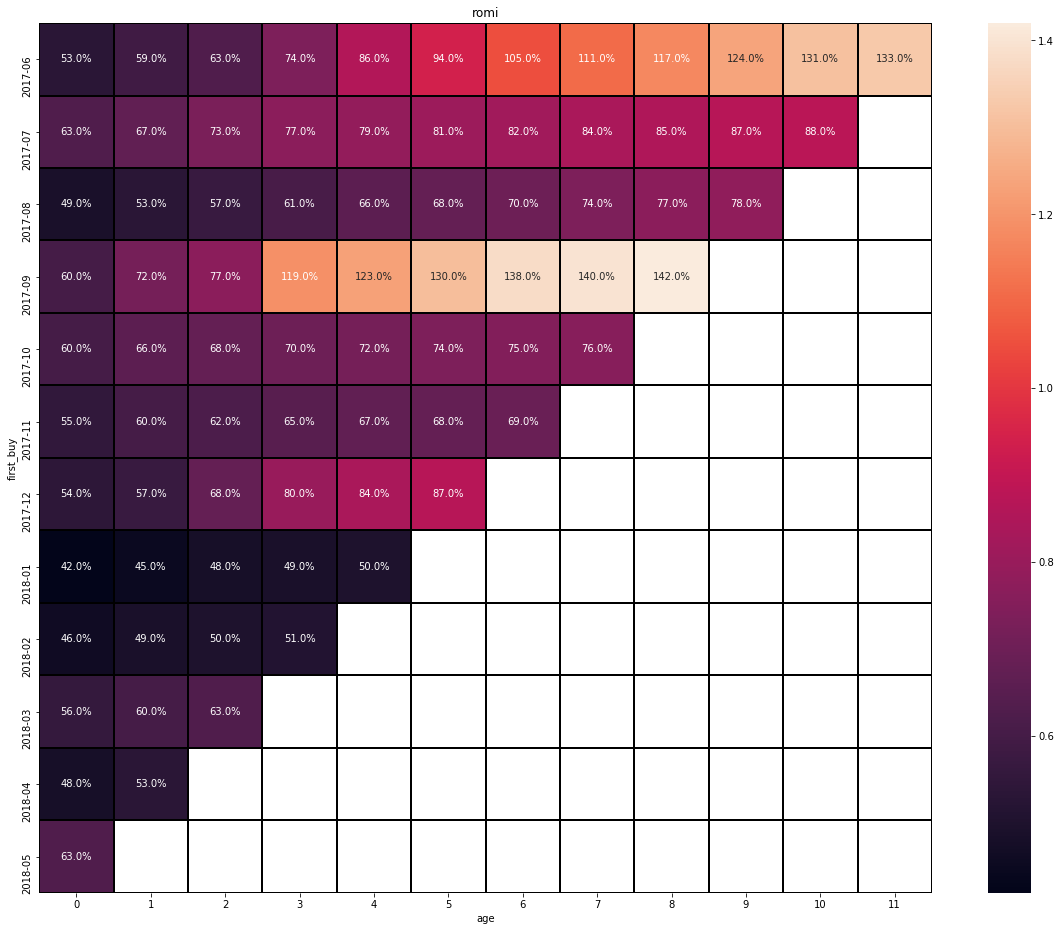

In [63]:
plt.figure(figsize=(20, 16))
plt.title('romi')
sns.heatmap(report_new_output, annot=True, fmt='.1%', linewidths=1, linecolor='black');

In [64]:
print('Средний ROMI за 6 месяцев после первой покупки {:.1%}'.format(report_new_output.mean(axis=0)[5]))

Средний ROMI за 6 месяцев после первой покупки 86.0%


Средний РОМИ окупился после того, как была запущенна массовая реклама под новый год. Остальные месяцы отбиваются очень плохо.

# На сколько окупились расходы(по источнику)? (ROI)

In [65]:
# посчитаем сас и romi
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs_source = costs.groupby(['month','source_id']).sum()#agg({'costs':'sum'})
report_new_sourse = pd.merge(report_sourse, monthly_costs_source, left_on=['first_buy', 'source_id'], right_on=['month', 'source_id'])
report_new_sourse['cac'] = report_new_sourse['costs'] / report_new_sourse['n_buyers']
report_new_sourse['first_buy'] = report_new_sourse['first_buy'].dt.strftime('%Y-%m')
report_new_sourse['romi'] = report_new_sourse['ltv'] / report_new_sourse['cac']
report_new_sourse

,first_buy,source_id,n_buyers,order_month,revenue,age,ltv,costs,cac,romi
0,2017-06,1,202,2017-06-01,1264.20,0,6.258416,1125.61,5.572327,1.123124
1,2017-06,1,202,2017-07-01,372.72,1,1.845149,1125.61,5.572327,0.331127
2,2017-06,1,202,2017-08-01,156.77,2,0.776089,1125.61,5.572327,0.139276
3,2017-06,1,202,2017-09-01,695.88,3,3.444950,1125.61,5.572327,0.618225
4,2017-06,1,202,2017-10-01,766.85,4,3.796287,1125.61,5.572327,0.681275
...,...,...,...,...,...,...,...,...,...,...
507,2018-05,3,763,2018-05-01,2844.81,0,3.728453,9411.42,12.334758,0.302272
508,2018-05,4,746,2018-05-01,3135.24,0,4.202735,4214.21,5.649075,0.743969
509,2018-05,5,505,2018-05-01,2087.24,0,4.133149,3669.56,7.266455,0.568798
510,2018-05,9,55,2018-05-01,205.68,0,3.739636,362.17,6.584909,0.567910


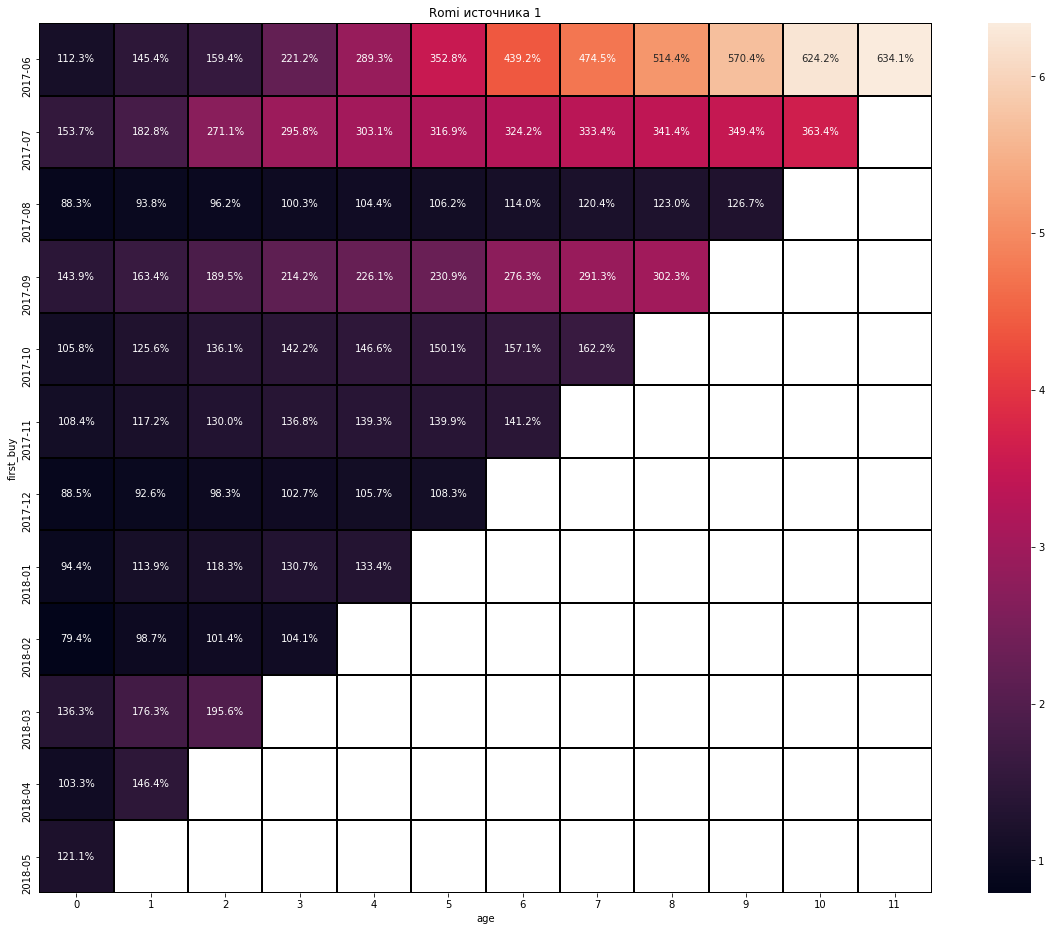

Средний ROMI за 6 месяцев после первой покупки 200.7%


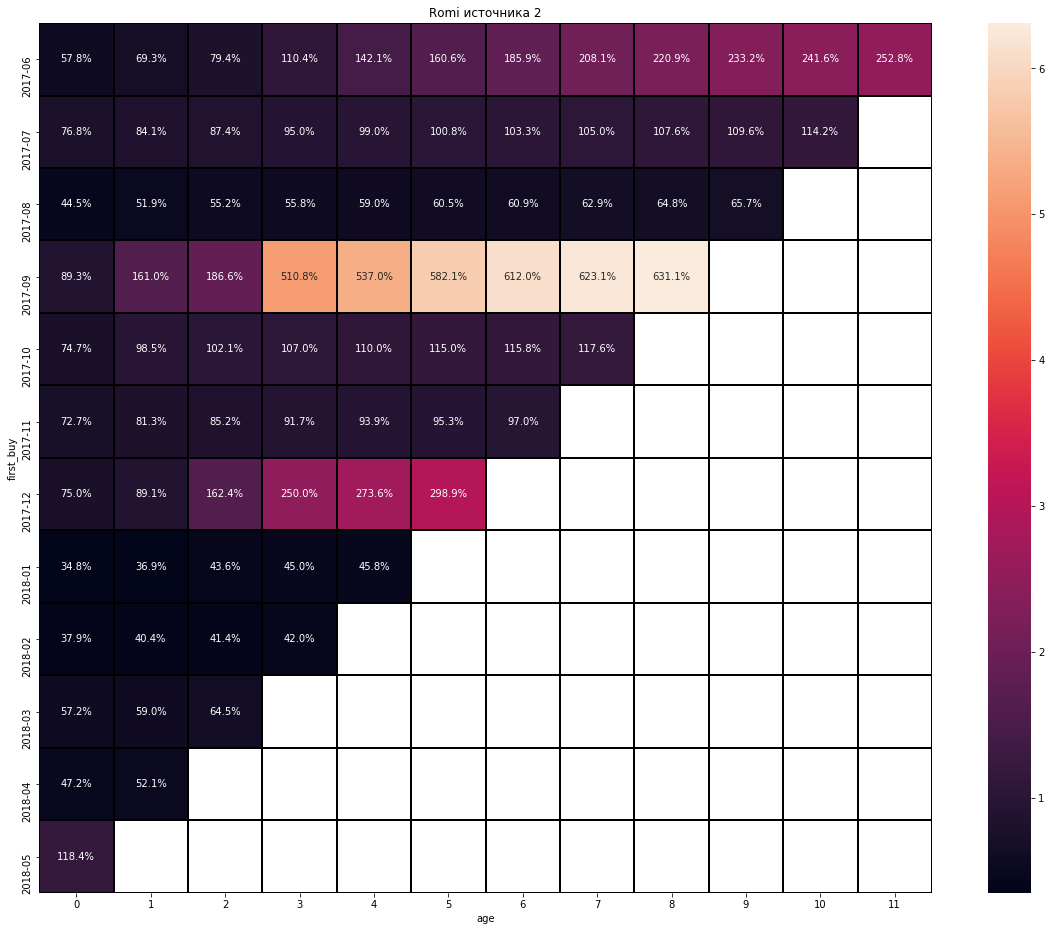

Средний ROMI за 6 месяцев после первой покупки 201.9%


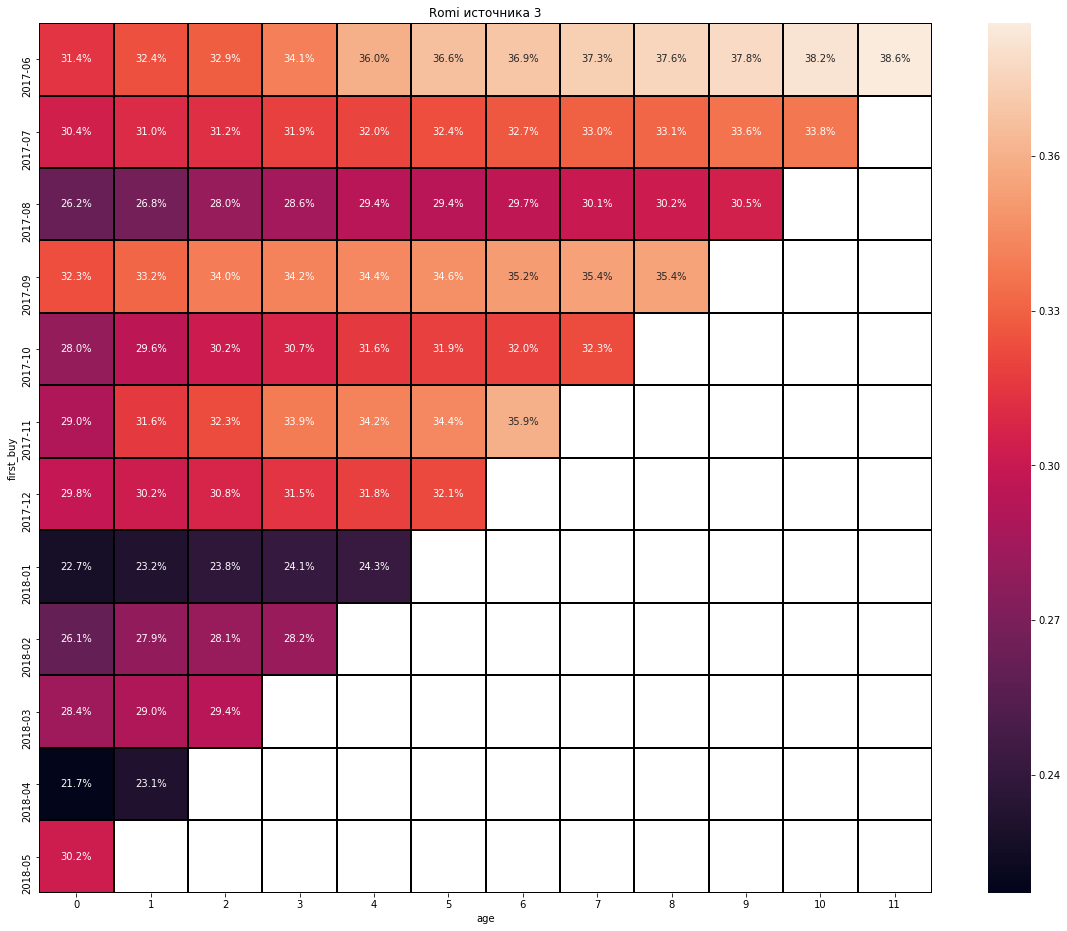

Средний ROMI за 6 месяцев после первой покупки 33.1%


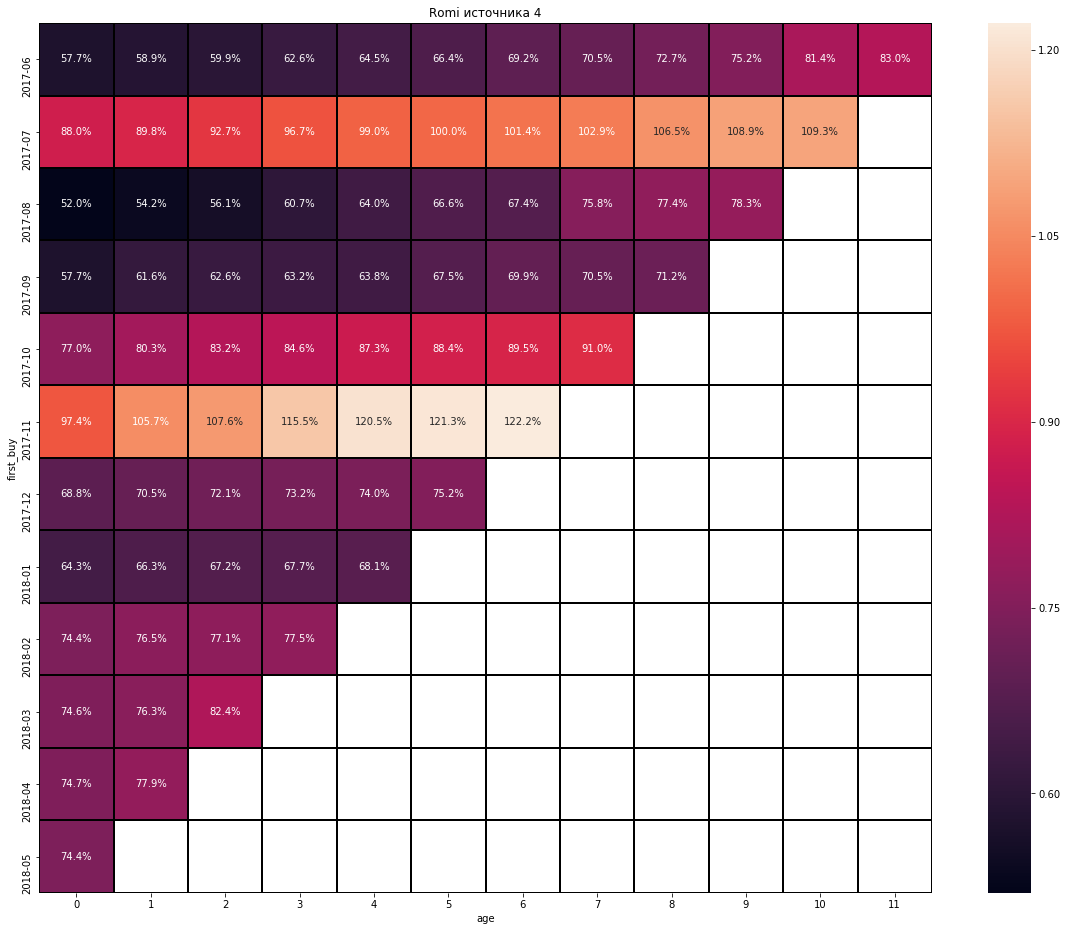

Средний ROMI за 6 месяцев после первой покупки 83.6%


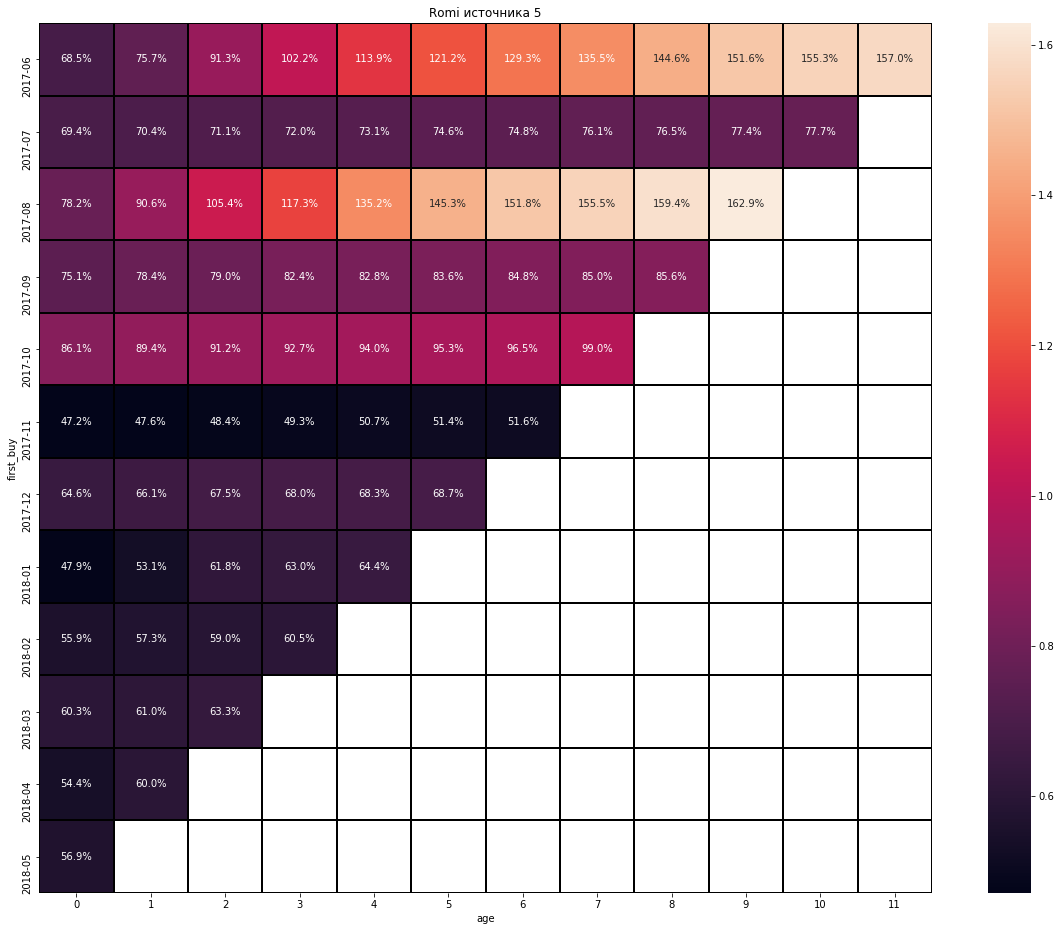

Средний ROMI за 6 месяцев после первой покупки 91.4%


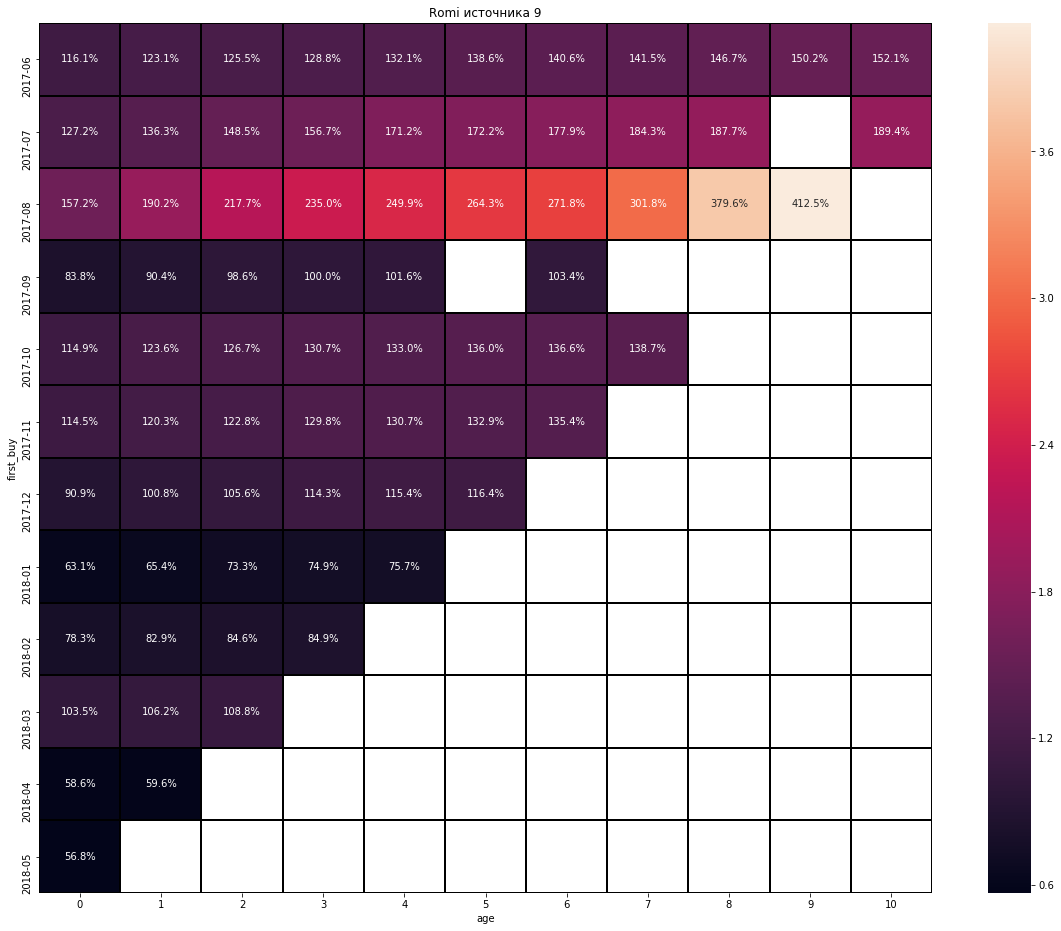

Средний ROMI за 6 месяцев после первой покупки 160.1%


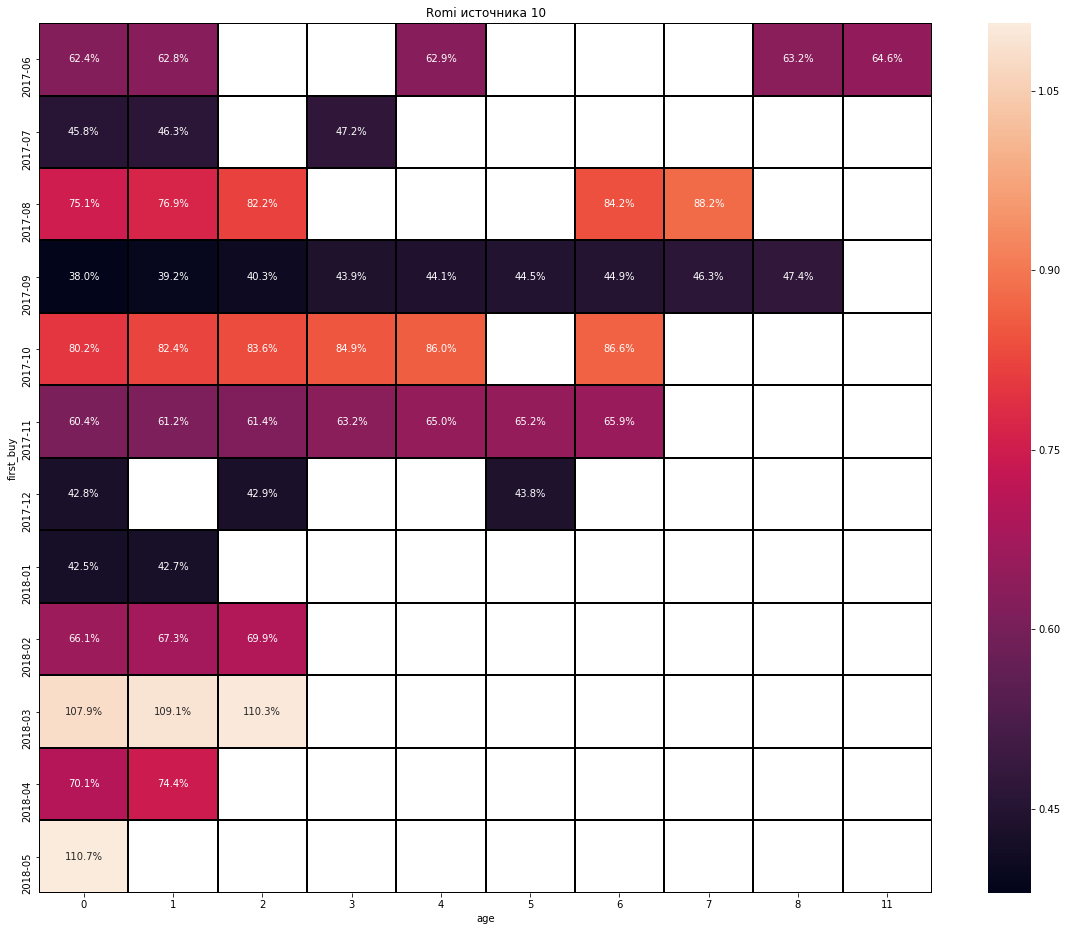

Средний ROMI за 6 месяцев после первой покупки 51.2%


In [66]:
for source in report_new_sourse.source_id.unique():
    output = report_new_sourse.query('source_id == @source').pivot_table(
    index='first_buy', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum(axis=1)
    plt.figure(figsize=(20, 16))
    sns.heatmap(output, annot=True, fmt='.1%', linewidths=1, linecolor='black');
    plt.title('Romi источника '+str(source))
    plt.show()
    print('Средний ROMI за 6 месяцев после первой покупки {:.1%}'.format(output.mean(axis=0)[5]))

По итогу самые эффективные источники оказались - 1 и 2. С средней категории находится 5 источник.
Источник 9 хорошо работал до недавнего времени, однако он, видимо, устарел и перестал действовать на аудиторию.

# Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?

Какие источники/платформы вы бы порекомендовали?
- рекомендую 1 и 2 источники. Они не самые дешевые, но окупаться начинают очень быстро. 3 источник лучше не использовать так плотно, так как у него не очень лояльная аудитория для вашего проекта. Ориентироваться лучше всего на десктоп из-за его дешевезны за человека.
Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?
- ориентировался на метрики первого входа, средней прибыли, LTV, ROMI, распределения по девайсам и затраты на маркетинг. Остальные были лишь для дополнительной проверки.

Выводы:
На данный момент нужно пересмотреть распределение средств на источники, а так же сконцентрироваться на десктоп платформе, либо оптимизировать лучше под тач.
Все платежи поступают сразу же, следовательно для быстрого решения нужно сконцентрировать силы на 1 и 2 источниках, так как там наибольшая окупаемость и чем больше первых заходов - тем больше первых покупок.

Для медленного, но более надежного метода, необходимо работать над удержанием аудитории. Как показала тепловая карта, пользователи возвращаются назад в праздник, следовательно, нужно заставить пользователя делать это чаще, так как помимо нового года есть еще и другие красные дни.  

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Итоговый комментарий </h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> Поздравляю! Теперь все неточности устранены и можно смело идит дальше! Успехов в прохождении курса!